<a href="https://colab.research.google.com/github/sajsax123/Intrusion-Detection-Systems-NIDS-and-HIDS/blob/main/NIDS_and_HIDS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NSL-KDD

## Importing and Data Preprocessing

### Importing, Dropping and Converting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv("KDDTrain+_20Percent.arff.csv")
data

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data    SF        491          0     0   
1             0           udp     other    SF        146          0     0   
2             0           tcp   private    S0          0          0     0   
3             0           tcp      http    SF        232       8153     0   
4             0           tcp      http    SF        199        420     0   
...         ...           ...       ...   ...        ...        ...   ...   
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                   0       0    0  ...                  25   
1                   0       0    0  ...                   1   
2                   0       0    0  ...                  26   
3                   0       0    0  ...                 255   
4                   0       0    0  ...                 255   
...               ...     ...  ...  ...                 ...   
25187               0       0    0  ...                   7   
25188               0       0    0  ...                  39   
25189               0       0    0  ...                  13   
25190               0       0    0  ...                  20   
25191               0       0    0  ...                  49   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                        0.17                    0.03   
1                        0.00                    0.60   
2                        0.10                    0.05   
3                        1.00                    0.00   
4                        1.00                    0.00   
...                       ...                     ...   
25187                    0.03                    0.06   
25188                    1.00                    0.00   
25189                    0.05                    0.07   
25190                    0.08                    0.06   
25191                    0.19                    0.03   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                             0.17                         0.00   
1                             0.88                         0.00   
2                             0.00                         0.00   
3                             0.03                         0.04   
4                             0.00                         0.00   
...                            ...                          ...   
25187                         0.00                         0.00   
25188                         1.00                         0.18   
25189                         0.00                         0.00   
25190                         0.00                         0.00   
25191                         0.01                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                      0.00                  0.05   
1                      0.00                      0.00                  0.00   
2                      1.00                      1.00                  0.00   
3                      0.03                      0.01                  0.00   
4                      0.00                      0.00                  0.00   
...                     ...                       ...                   ...   
25187                  0.00                      0.00                  1.00   
25188                  0.00                      0.00                  0.00   
25189                  0.00                      0.00                  1.00   
25190                  1.00                  

In [ ]:
data.drop(data.columns[[0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,30,31,34,35,36,37,38,39,40]], axis = 1, inplace=True)
data

service  flag  src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  \
0      ftp_data    SF        491          0           1.00           0.00   
1         other    SF        146          0           0.08           0.15   
2       private    S0          0          0           0.05           0.07   
3          http    SF        232       8153           1.00           0.00   
4          http    SF        199        420           1.00           0.00   
...         ...   ...        ...        ...            ...            ...   
25187      exec  RSTO          0          0           0.07           0.07   
25188  ftp_data    SF        334          0           1.00           0.00   
25189   private   REJ          0          0           0.07           0.07   
25190      nnsp    S0          0          0           0.14           0.06   
25191    finger    S0          0          0           0.24           0.11   

       dst_host_srv_count  dst_host_same_srv_rate    class  
0                      25                    0.17   normal  
1                       1                    0.00   normal  
2                      26                    0.10  anomaly  
3                     255                    1.00   normal  
4                     255                    1.00   normal  
...                   ...                     ...      ...  
25187                   7                    0.03  anomaly  
25188                  39                    1.00  anomaly  
25189                  13                    0.05  anomaly  
25190                  20                    0.08  anomaly  
25191                  49                    0.19  anomaly  

[25192 rows x 9 columns]

In [ ]:
data['flag'] = data['flag'].replace(['SF', 'S0','REJ', 'RSTR', 'SH','RSTO','S1','RSTOS0','S3','S2','OTH'], [1, 2,3,4,5,6,7,8,9,10,11])
data['service'] = data['service'].replace(['ftp_data', 'other','private', 'http', 'remote_job','name','netbios_ns','eco_i','mtp','telnet','finger','domain_u','supdup','uucp_path','Z39_50','smtp','csnet_ns','uucp','netbios_dgm','urp_i','auth','domain','ftp','bgp','ldap','ecr_i','gopher','vmnet','systat','http_443','efs','whois','imap4','iso_tsap','echo','klogin','link','sunrpc','login','kshell','sql_net','time','hostnames','exec','ntp_u','discard','nntp','courier','ctf','ssh','daytime','shell','netstat','pop_3','nnsp','IRC','pop_2','printer','tim_i','pm_dump','red_i','netbios_ssn','rje','X11','urh_i','http_8001'], [1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66])
data

service  flag  src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  \
0            1     1        491          0           1.00           0.00   
1            2     1        146          0           0.08           0.15   
2            3     2          0          0           0.05           0.07   
3            4     1        232       8153           1.00           0.00   
4            4     1        199        420           1.00           0.00   
...        ...   ...        ...        ...            ...            ...   
25187       44     6          0          0           0.07           0.07   
25188        1     1        334          0           1.00           0.00   
25189        3     3          0          0           0.07           0.07   
25190       55     2          0          0           0.14           0.06   
25191       11     2          0          0           0.24           0.11   

       dst_host_srv_count  dst_host_same_srv_rate    class  
0                      25                    0.17   normal  
1                       1                    0.00   normal  
2                      26                    0.10  anomaly  
3                     255                    1.00   normal  
4                     255                    1.00   normal  
...                   ...                     ...      ...  
25187                   7                    0.03  anomaly  
25188                  39                    1.00  anomaly  
25189                  13                    0.05  anomaly  
25190                  20                    0.08  anomaly  
25191                  49                    0.19  anomaly  

[25192 rows x 9 columns]

### Normalization

In [ ]:
# Split the dataset into features (X) and labels (y)
X = data.iloc[:, :-1]
y = data['class']
y=y.to_frame()
y['class'] = y['class'].replace(['normal', 'anomaly'], [0,1])


In [ ]:
# Using Sklearn & MinMax Scalar.
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_data= pd.DataFrame(x_scaled)
normalized_data

0    1    2    3    4    5    6    7
0     0.00 0.00 0.00 0.00 1.00 0.00 0.10 0.17
1     0.02 0.00 0.00 0.00 0.08 0.15 0.00 0.00
2     0.03 0.10 0.00 0.00 0.05 0.07 0.10 0.10
3     0.05 0.00 0.00 0.00 1.00 0.00 1.00 1.00
4     0.05 0.00 0.00 0.00 1.00 0.00 1.00 1.00
...    ...  ...  ...  ...  ...  ...  ...  ...
25187 0.66 0.50 0.00 0.00 0.07 0.07 0.03 0.03
25188 0.00 0.00 0.00 0.00 1.00 0.00 0.15 1.00
25189 0.03 0.20 0.00 0.00 0.07 0.07 0.05 0.05
25190 0.83 0.10 0.00 0.00 0.14 0.06 0.08 0.08
25191 0.15 0.10 0.00 0.00 0.24 0.11 0.19 0.19

[25192 rows x 8 columns]

## Models

### LazyPredict

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(predictions)
models

 97%|█████████▋| 28/29 [01:32<00:01,  1.69s/it]

[LightGBM] [Info] Number of positive: 8227, number of negative: 9407
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466542 -> initscore=-0.134033
[LightGBM] [Info] Start training from score -0.134033


100%|██████████| 29/29 [01:33<00:00,  3.21s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
DecisionTreeClassifier             0.99               0.99     0.99      0.99   
ExtraTreeClassifier                0.99               0.99     0.99      0.99   
KNeighborsClassifier               0.98               0.98     0.98      0.98   
AdaBoostClassifier                 0.98               0.98     0.98      0.98   
LabelPropagation                   0.97               0.96     0.96      0.97   
LabelSpreading                     0.96               0.96     0.96      0.96   
SVC                                0.94               0.94     0.94      0.94   
RidgeClassifier                    0.89               0.89     0.89      0.89   
LinearDiscriminantAnalysis         0.89               0.89     0.89      0.89   
RidgeClassifierCV                  0.89               0.89     0.89      0.89   
CalibratedClassifierCV             0.89               0.89     0.89      0.89   
LogisticRegression                 0.89               0.89     0.89      0.89   
LinearSVC                          0.89               0.88     0.88      0.89   
SGDClassifier                      0.88               0.88     0.88      0.88   
BernoulliNB                        0.88               0.88     0.88      0.88   
NuSVC                              0.88               0.88     0.88      0.88   
GaussianNB                         0.88               0.87     0.87      0.88   
PassiveAggressiveClassifier        0.87               0.87     0.87      0.87   
NearestCentroid                    0.87               0.87     0.87      0.87   
QuadraticDiscriminantAnalysis      0.87               0.86     0.86      0.87   
Perceptron                         0.86               0.85     0.85      0.86   
DummyClassifier                    0.53               0.50     0.50      0.37   

                               Time Taken  
Model                                      
RandomForestClassifier               1.09  
LGBMClassifier                       0.37  
XGBClassifier                        1.36  
BaggingClassifier                    0.32  
ExtraTreesClassifier                 1.66  
DecisionTreeClassifier               0.16  
ExtraTreeClassifier                  0.12  
KNeighborsClassifier                 1.29  
AdaBoostClassifier                   0.68  
LabelPropagation                    26.43  
LabelSpreading                      23.71  
SVC                                  4.33  
RidgeClassifier                      0.07  
LinearDiscriminantAnalysis           0.16  
RidgeClassifierCV                    0.07  
CalibratedClassifierCV               7.00  
LogisticRegression                   0.09  
LinearSVC                            1.09  
SGDClassifier                        0.15  
BernoulliNB                          0.17  
NuSVC                               22.08  
GaussianNB                           0.07  
PassiveAggressiveClassifier          0.07  
NearestCentroid                      0.06  
QuadraticDiscriminantAnalysis        0.08  
Perceptron                           0.07  
DummyClassifier                      0.15

### LightGBM

In [ ]:
!pip install optuna

In [ ]:
#import lightgbm as lgb
import optuna
import optuna.integration.lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Setting hyperparameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'data_sampling_statergy': 'goss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
num_round = 300
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

[I 2023-09-06 12:34:18,275] A new study created in memory with name: no-name-cfa407c0-ea3a-408b-a7d3-c6e270621fab
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0186557
[3]	valid_0's binary_error: 0.0103202
[4]	valid_0's binary_error: 0.00926171
[5]	valid_0's binary_error: 0.00860016
[6]	valid_0's binary_error: 0.00793861
[7]	valid_0's binary_error: 0.00833554
[8]	valid_0's binary_error: 0.00926171
[9]	valid_0's binary_error: 0.0091294
[10]	valid_0's binary_error: 0.0091294
[11]	valid_0's binary_error: 0.00820323
[12]	valid_0's binary_error: 0.00833554
[13]	valid_0's binary_error: 0.00860016
[14]	valid_0's binary_error: 0.00833554
[15]	valid_0's binary_error: 0.00807092
[16]	valid_0's binary_error: 0.00820323
[17]	valid_0's binary

feature_fraction, val_score: 0.002514:  14%|#4        | 1/7 [00:01<00:10,  1.75s/it]

[292]	valid_0's binary_error: 0.00251389
[293]	valid_0's binary_error: 0.00251389
[294]	valid_0's binary_error: 0.00238158
[295]	valid_0's binary_error: 0.00238158
[296]	valid_0's binary_error: 0.00238158
[297]	valid_0's binary_error: 0.00251389
[298]	valid_0's binary_error: 0.00251389
[299]	valid_0's binary_error: 0.00251389
[300]	valid_0's binary_error: 0.00251389
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0169357
[3]	valid_0's binary_error: 0.011511
[4]	valid_0's binary_error: 0.00979095
[5]	valid_0's binary_error: 0.00979095
[6]	valid_0's binary_error: 0.00899709
[7]	valid_0's binary_error: 0.00886478
[8]	valid

feature_fraction, val_score: 0.002249:  29%|##8       | 2/7 [00:08<00:22,  4.43s/it]

[298]	valid_0's binary_error: 0.00238158
[299]	valid_0's binary_error: 0.00224927
[300]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0137603
[3]	valid_0's binary_error: 0.00926171
[4]	valid_0's binary_error: 0.00926171
[5]	valid_0's binary_error: 0.00992326
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00886478
[8]	valid_0's binary_error: 0.00807092
[9]	valid_0's binary_error: 0.0078063
[10]	valid_0's binary_error: 0.00793861
[11]	valid_0's binary_error: 0.00833554
[12]	valid_0's binary_error: 0.00833554
[13]	valid_0's binary_error: 0.00886478
[14]	valid_0's b

feature_fraction, val_score: 0.002249:  43%|####2     | 3/7 [00:21<00:34,  8.60s/it]

[298]	valid_0's binary_error: 0.00251389
[299]	valid_0's binary_error: 0.00251389
[300]	valid_0's binary_error: 0.00238158
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0120402
[3]	valid_0's binary_error: 0.0113787
[4]	valid_0's binary_error: 0.0108494
[5]	valid_0's binary_error: 0.0105848
[6]	valid_0's binary_error: 0.00992326
[7]	valid_0's binary_error: 0.0101879
[8]	valid_0's binary_error: 0.0091294
[9]	valid_0's binary_error: 0.0091294
[10]	valid_0's binary_error: 0.0091294
[11]	valid_0's binary_error: 0.00820323
[12]	valid_0's binary_error: 0.0082032

feature_fraction, val_score: 0.002249:  57%|#####7    | 4/7 [00:30<00:26,  8.80s/it]

[296]	valid_0's binary_error: 0.00277851
[297]	valid_0's binary_error: 0.00277851
[298]	valid_0's binary_error: 0.00277851
[299]	valid_0's binary_error: 0.00277851
[300]	valid_0's binary_error: 0.00277851
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.121858
[3]	valid_0's binary_error: 0.0407515
[4]	valid_0's binary_error: 0.0320191
[5]	valid_0's binary_error: 0.0165388
[6]	valid_0's binary_error: 0.0152157
[7]	valid_0's binary_error: 0.0109817
[8]	valid_0's binary_error: 0.0128341
[9]	valid_0's binary_error: 0.0146864
[10]	valid_0's binary_error: 0.0140249
[11]	valid_0's binary_error: 0.013231
[12]	valid_0's binary_er

feature_fraction, val_score: 0.002249:  71%|#######1  | 5/7 [00:33<00:13,  6.70s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0137603
[3]	valid_0's binary_error: 0.00926171
[4]	valid_0's binary_error: 0.00926171
[5]	valid_0's binary_error: 0.00992326
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00886478
[8]	valid_0's binary_error: 0.00807092
[9]	valid_0's binary_error: 0.0078063
[10]	valid_0's binary_error: 0.00793861
[11]	valid_0's binary_error: 0.00833554
[12]	valid_0's binary_error: 0.00833554
[13]	valid_0's binary_error: 0.00886478
[14]	valid_0's binary_error: 0.00873247
[15]	valid_0's binary_error: 0.00860016
[16]	valid_0's binary_error: 0.00820323
[17]	valid_0's bina

feature_fraction, val_score: 0.002249:  86%|########5 | 6/7 [00:35<00:04,  4.87s/it]

[300]	valid_0's binary_error: 0.00238158
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.017068
[3]	valid_0's binary_error: 0.00979095
[4]	valid_0's binary_error: 0.0091294
[5]	valid_0's binary_error: 0.00939402
[6]	valid_0's binary_error: 0.00899709
[7]	valid_0's binary_error: 0.00807092
[8]	valid_0's binary_error: 0.00807092
[9]	valid_0's binary_error: 0.00846785
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00846785
[12]	valid_0's binary_error: 0.00846785
[13]	valid_0's binary_error: 0.00846785
[14]	valid_0's binary_error: 0.00833554
[15]	valid_0's binary_error: 0.00833554
[16]	valid_0's bina

num_leaves, val_score: 0.002249:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[

num_leaves, val_score: 0.002249:   5%|5         | 1/20 [00:01<00:34,  1.79s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0199788
[3]	valid_0's binary_error: 0.0148187
[4]	valid_0's binary_error: 0.0119079
[5]	valid_0's binary_error: 0.0117756
[6]	valid_0's binary_error: 0.0111141
[7]	valid_0's binary_error: 0.0107171
[8]	valid_0's binary_error: 0.0091294
[9]	valid_0's binary_error: 0.00952633
[10]	valid_0's binary_error: 0.00979095
[11]	valid_0's binary_error: 0.0100556
[12]	valid_0's binary_error: 0.0101879
[13]	valid_0's binary_error: 0.0101879
[14]	valid_0's binary_error: 0.0091294
[15]	valid_0's binary_error: 0.00939402
[16]	valid_0's binary_error: 0.00965864
[17]	valid_0's binary_error:

num_leaves, val_score: 0.002249:  10%|#         | 2/20 [00:02<00:24,  1.36s/it]


[300]	valid_0's binary_error: 0.0026462
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0166711
[3]	valid_0's binary_error: 0.0123048
[4]	valid_0's binary_error: 0.00979095
[5]	valid_0's binary_error: 0.00979095
[6]	valid_0's binary_error: 0.00899709
[7]	valid_0's binary_error: 0.00886478
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00820323
[11]	valid_0's binary_error: 0.00899709
[12]	valid_0's binary_error: 0.00886478
[13]	valid_0's binary_error: 0.00860016
[14]	valid_0's binary_error: 0.00833554
[15]	valid_0's binary_error: 0.00846785
[16]	valid_0's bin

num_leaves, val_score: 0.002249:  15%|#5        | 3/20 [00:04<00:22,  1.30s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_

num_leaves, val_score: 0.002117:  20%|##        | 4/20 [00:07<00:33,  2.11s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_

num_leaves, val_score: 0.001985:  25%|##5       | 5/20 [00:12<00:49,  3.30s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.0086

num_leaves, val_score: 0.001985:  30%|###       | 6/20 [00:15<00:45,  3.22s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.0086

num_leaves, val_score: 0.001985:  35%|###5      | 7/20 [00:18<00:41,  3.16s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.0086

num_leaves, val_score: 0.001985:  40%|####      | 8/20 [00:21<00:36,  3.01s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.0086

num_leaves, val_score: 0.001985:  45%|####5     | 9/20 [00:26<00:38,  3.50s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0

num_leaves, val_score: 0.001985:  50%|#####     | 10/20 [00:28<00:32,  3.26s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.0086

num_leaves, val_score: 0.001985:  55%|#####5    | 11/20 [00:31<00:27,  3.06s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[14]	valid_0's binary_error: 0.00701244
[15]	valid_0's binary_err

num_leaves, val_score: 0.001720:  60%|######    | 12/20 [00:33<00:22,  2.83s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[14]	valid_0's binary_error: 0.00701244
[15]	valid_0's binary_err

num_leaves, val_score: 0.001720:  65%|######5   | 13/20 [00:38<00:22,  3.23s/it]

[300]	valid_0's binary_error: 0.00198465
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00860016
[9]	valid_0's binary_error: 0.00860016
[10]	valid_0's binary_error: 0.00767399
[11]	valid_0's binary_error: 0.00793861
[12]	valid_0's binary_error: 0.00793861
[13]	valid_0's binary_error: 0.00807092
[14]	valid_0's binary_error: 0.00714475
[15]	valid_0's binary_error: 0.00740937
[16]	valid_0's bina

num_leaves, val_score: 0.001720:  70%|#######   | 14/20 [00:39<00:16,  2.76s/it]

[293]	valid_0's binary_error: 0.00238158
[294]	valid_0's binary_error: 0.00238158
[295]	valid_0's binary_error: 0.00238158
[296]	valid_0's binary_error: 0.00238158
[297]	valid_0's binary_error: 0.00238158
[298]	valid_0's binary_error: 0.00238158
[299]	valid_0's binary_error: 0.00238158
[300]	valid_0's binary_error: 0.00238158
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's bina

num_leaves, val_score: 0.001720:  75%|#######5  | 15/20 [00:42<00:13,  2.76s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.0086

num_leaves, val_score: 0.001720:  80%|########  | 16/20 [00:45<00:11,  2.83s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	v

num_leaves, val_score: 0.001720:  85%|########5 | 17/20 [00:50<00:10,  3.46s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[14]	valid_0's binary_error: 0.00701244
[15]	valid_0's binary_err

num_leaves, val_score: 0.001720:  90%|######### | 18/20 [00:52<00:06,  3.13s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.0086

num_leaves, val_score: 0.001720:  95%|#########5| 19/20 [00:55<00:03,  3.05s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_

bagging, val_score: 0.001720:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0152157
[3]	valid_0's binary_error: 0.0103202
[4]	valid_0's binary_error: 0.00992326
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00860016
[7]	valid_0's binary_error: 0.00860016
[8]	valid_0's binary_error: 0.00860016
[9]	valid_0's binary_error: 0.00833554
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00886478
[12]	valid_0's binary_error: 0.00926171
[13]	valid_0's binary_error: 0.00952633


bagging, val_score: 0.001720:  10%|#         | 1/10 [00:04<00:41,  4.56s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.018788
[3]	valid_0's binary_error: 0.0141572
[4]	valid_0's binary_error: 0.0134956
[5]	valid_0's binary_error: 0.0119079
[6]	valid_0's binary_error: 0.0113787
[7]	valid_0's binary_error: 0.00939402
[8]	valid_0's binary_error: 0.00952633
[9]	valid_0's binary_error: 0.00833554
[10]	valid_0's binary_error: 0.00820323
[11]	valid_0's binary_error: 0.00807092
[12]	valid_0's binary_error: 0.00820323
[13]	valid_0's binary_error: 0.00

bagging, val_score: 0.001720:  20%|##        | 2/10 [00:06<00:25,  3.25s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0162741
[3]	valid_0's binary_error: 0.011511
[4]	valid_0's binary_error: 0.0107171
[5]	valid_0's binary_error: 0.0105848
[6]	valid_0's binary_error: 0.00965864
[7]	valid_0's binary_error: 0.00899709
[8]	valid_0's binary_error: 0.00860016
[9]	valid_0's binary_error: 0.00846785
[10]	valid_0's binary_error: 0.00873247
[11]	valid_0's binary_error: 0.00820323
[12]	valid_0's binary_error: 0.00820323
[13]	valid_0's binary_error: 0.00886478
[14]	valid_0's binary_error: 0.00820323
[15]	valid_0's binary_error

bagging, val_score: 0.001720:  30%|###       | 3/10 [00:09<00:19,  2.82s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0152157
[3]	valid_0's binary_error: 0.0100556
[4]	valid_0's binary_error: 0.0100556
[5]	valid_0's binary_error: 0.00939402
[6]	valid_0's binary_error: 0.0091294
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00833554
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00807092
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00899709
[1

bagging, val_score: 0.001720:  40%|####      | 4/10 [00:11<00:16,  2.71s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0186557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0157449
[4]	valid_0's binary_error: 0.0127018
[5]	valid_0's binary_error: 0.0124372
[6]	valid_0's binary_error: 0.0112464
[7]	valid_0's binary_error: 0.0103202
[8]	valid_0's binary_error: 0.00833554
[9]	valid_0's binary_error: 0.0078063
[10]	valid_0's 

bagging, val_score: 0.001720:  50%|#####     | 5/10 [00:16<00:16,  3.35s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0179942
[3]	valid_0's binary_error: 0.0120402
[4]	valid_0's binary_error: 0.00965864
[5]	valid_0's binary_error: 0.0100556
[6]	valid_0's binary_error: 0.00926171
[7]	valid_0's binary_error: 0.0091294
[8]	valid_0's binary_error: 0.00886478
[9]	valid_0's binary_error: 0.00754168
[10]	valid_0's binary_error: 0.00714475
[11]	valid_0's binary_error: 0.00727706
[12]	valid_0's binary_error: 0.00767399
[13]	valid_0's binary_error: 0.0078063
[14

bagging, val_score: 0.001720:  60%|######    | 6/10 [00:19<00:13,  3.27s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0172003
[3]	valid_0's binary_error: 0.0112464
[4]	valid_0's binary_error: 0.00952633
[5]	valid_0's binary_error: 0.00979095
[6]	valid_0's binary_error: 0.00886478
[7]	valid_0's binary_error: 0.00833554
[8]	valid_0's binary_error: 0.00833554
[9]	valid_0's binary_error: 0.00833554
[10]	valid_0's binary_error: 0.00820323
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00860016
[13]	valid_0's binary_error: 0.00886478
[14]	valid_0's binary_error: 0.00820323
[15]	valid_0's binary_er

bagging, val_score: 0.001720:  70%|#######   | 7/10 [00:21<00:09,  3.00s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0182588
[3]	valid_0's binary_error: 0.0142895
[4]	valid_0's binary_error: 0.011511
[5]	valid_0's binary_error: 0.0116433
[6]	valid_0's binary_error: 0.011511
[7]	valid_0's binary_error: 0.00979095
[8]	valid_0's binary_error: 0.00873247
[9]	valid_0's binary_error: 0.0078063
[10]	valid_0's binary_error: 0.00740937
[11]	valid_0's binary_error: 0.00767399
[12]	valid_0's binary_error: 0.00833554
[13]	valid_0's binary_error: 0.00820323
[14]	valid_0's binary_error: 0.00846785
[15]	valid_0's binary_error: 0

bagging, val_score: 0.001720:  80%|########  | 8/10 [00:24<00:05,  2.77s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0112464
[4]	valid_0's binary_error: 0.00926171
[5]	valid_0's binary_error: 0.0091294
[6]	valid_0's binary_error: 0.00886478
[7]	valid_0's binary_error: 0.00886478
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00846785
[10]	valid_0's binary_error: 0.00820323
[11]	valid_0's binary_error: 0.00873247
[12]	valid_0's binary_error: 0.00926171
[13]	valid_0's binary_error: 0.00939402
[

bagging, val_score: 0.001720:  90%|######### | 9/10 [00:28<00:03,  3.20s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0182588
[3]	valid_0's binary_error: 0.0142895
[4]	valid_0's binary_error: 0.011511
[5]	valid_0's binary_error: 0.0116433
[6]	valid_0's binary_error: 0.0109817
[7]	valid_0's binary_error: 0.00979095
[8]	valid_0's binary_error: 0.00899709
[9]	valid_0's binary_error: 0.00793861
[10]	valid_0's binary_error: 0.00754168
[11]	valid_0's binary_error: 0.00846785
[12]	valid_0's binary_error: 0.00886478
[13]	valid_0's binary_error: 0.00886478
[14]	valid_0's binary_error: 0.00886478
[15]	valid_0's binary_error:

feature_fraction_stage2, val_score: 0.001720:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[

feature_fraction_stage2, val_score: 0.001720:  17%|#6        | 1/6 [00:02<00:12,  2.43s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0210373
[3]	valid_0's binary_error: 0.0100556
[4]	valid_0's binary_error: 0.00939402
[5]	valid_0's binary_error: 0.00820323
[6]	valid_0's binary_error: 0.00820323
[7]	valid_0's binary_error: 0.00820323
[8]	valid_0's binary_error: 0.00833554
[9]	valid_0's binary_error: 0.00886478
[10]	valid_0's binary_error: 0.00886478
[11]	valid_0's binary_error: 0.00833554
[12]	valid_0's binary_error: 0.00820323
[13]	valid_0's binary_error: 0.00846785
[14]	valid_0's binary_error: 0.00807092
[15]	valid_0's binary_er

feature_fraction_stage2, val_score: 0.001720:  33%|###3      | 2/6 [00:04<00:09,  2.31s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0210373
[3]	valid_0's binary_error: 0.0100556
[4]	valid_0's binary_error: 0.00939402
[5]	valid_0's binary_error: 0.00820323
[6]	valid_0's binary_error: 0.00820323
[7]	valid_0's binary_error: 0.00820323
[8]	valid_0's binary_error: 0.00833554
[9]	valid_0's binary_error: 0.00886478
[10]	valid_0's binary_error: 0.00886478
[11]	valid_0's binary_error: 0.00833554
[12]	valid_0's binary_error: 0.00820323
[13]	valid_0's binary_error: 0.00846785
[14]	valid_0's binary_error: 0.00807092
[15]	valid_0's binary_er

feature_fraction_stage2, val_score: 0.001720:  50%|#####     | 3/6 [00:06<00:06,  2.29s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[14]	valid_0's binary_error: 0.00701244
[15]	valid_0's binary_err

feature_fraction_stage2, val_score: 0.001720:  67%|######6   | 4/6 [00:11<00:06,  3.15s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[14]	valid_0's binary_error: 0.00701244
[15]	valid_0's binary_err

feature_fraction_stage2, val_score: 0.001720:  83%|########3 | 5/6 [00:13<00:02,  2.87s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0.00767399
[14]	valid_0's binary_error: 0.00701244
[15]	valid_0's binary_err

regularization_factors, val_score: 0.001720:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0113787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.0100556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	val

regularization_factors, val_score: 0.001720:   5%|5         | 1/20 [00:01<00:31,  1.63s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[288]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[289]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[290]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[291]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

regularization_factors, val_score: 0.001720:  10%|#         | 2/20 [00:04<00:38,  2.16s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0173326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0121725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.0100556
[LightGBM] [Warnin

regularization_factors, val_score: 0.001720:  15%|#5        | 3/20 [00:07<00:48,  2.83s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0239481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.019185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0162741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.0150834
[LightGBM] [Warning

regularization_factors, val_score: 0.001720:  20%|##        | 4/20 [00:09<00:36,  2.31s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warni

regularization_factors, val_score: 0.001720:  25%|##5       | 5/20 [00:11<00:34,  2.28s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0223604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0169357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.014951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.0123048
[LightGBM] [Warning

regularization_factors, val_score: 0.001720:  30%|###       | 6/20 [00:12<00:27,  1.95s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[3]	valid_0's binary_error: 0.0111141
[4]	valid_0's binary_error: 0.0103202
[5]	valid_0's binary_error: 0.00965864
[6]	valid_0's binary_error: 0.00873247
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00846785
[9]	valid_0's binary_error: 0.00820323
[10]	valid_0's binary_error: 0.00846785
[11]	valid_0's binary_error: 0.00860016
[12]	valid_0's binary_error: 0.00873247
[13]	valid_0's binary_error: 0

regularization_factors, val_score: 0.001720:  35%|###5      | 7/20 [00:15<00:27,  2.11s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	va

regularization_factors, val_score: 0.001720:  40%|####      | 8/20 [00:19<00:33,  2.80s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warni

regularization_factors, val_score: 0.001720:  45%|####5     | 9/20 [00:21<00:29,  2.65s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0103202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warni

regularization_factors, val_score: 0.001720:  50%|#####     | 10/20 [00:24<00:25,  2.59s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00992326
[LightGBM] [Warni

regularization_factors, val_score: 0.001720:  55%|#####5    | 11/20 [00:26<00:22,  2.45s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.030696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0254035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0166711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.0169357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	vali

regularization_factors, val_score: 0.001720:  60%|######    | 12/20 [00:27<00:16,  2.06s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's binary_error: 0.00661551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[293]	valid_0's binary_error: 0.00661551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[294]	valid_0's binary_error: 0.00661551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's binary_error: 0.00661551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[296]	valid_0's binary_error: 0.00661551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's binary_error: 0.0

regularization_factors, val_score: 0.001720:  65%|######5   | 13/20 [00:32<00:19,  2.77s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0103202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warni

regularization_factors, val_score: 0.001720:  70%|#######   | 14/20 [00:34<00:16,  2.70s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	va

regularization_factors, val_score: 0.001720:  75%|#######5  | 15/20 [00:36<00:12,  2.57s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0112464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00992326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	va

regularization_factors, val_score: 0.001720:  80%|########  | 16/20 [00:38<00:09,  2.38s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0103202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	va

regularization_factors, val_score: 0.001720:  85%|########5 | 17/20 [00:41<00:07,  2.34s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	va

regularization_factors, val_score: 0.001720:  90%|######### | 18/20 [00:45<00:06,  3.01s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0111141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00965864
[LightGBM] [Warni

regularization_factors, val_score: 0.001720:  95%|#########5| 19/20 [00:47<00:02,  2.76s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0177296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0113787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0104525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.00992326
[LightGBM] [Warni

regularization_factors, val_score: 0.001720: 100%|##########| 20/20 [00:49<00:00,  2.50s/it]

[284]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[285]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[286]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[287]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[288]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[289]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[290]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[291]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's binary_error: 0.00224927
[LightGBM] [Warning] No further

[I 2023-09-06 12:37:31,816] Trial 62 finished with value: 0.0021169621593014024 and parameters: {'lambda_l1': 0.04801739699242014, 'lambda_l2': 5.4943349486550015e-06}. Best is trial 47 with value: 0.0017200317544323895.
min_data_in_leaf, val_score: 0.001720:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0189203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.014951
[4]	valid_0's binary_error: 0.0144218
[5]	valid_0's binary_error: 0.0117756
[6]	valid_0's binary_error: 0.0125695
[7]	valid_0's binary_error: 0.0105848
[8]	valid_0's binary_error: 0.0091294
[9]	valid_0's binary_error: 0.00899709
[10]	valid_0's binary_error: 0.00979095
[11]	valid_0's binary_error: 0.00873247


min_data_in_leaf, val_score: 0.001720:  20%|##        | 1/5 [00:02<00:11,  2.84s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.0394284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0248743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.0178619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.0144218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	val

min_data_in_leaf, val_score: 0.001720:  40%|####      | 2/5 [00:07<00:12,  4.11s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0136279
[3]	valid_0's binary_error: 0.00899709
[4]	valid_0's binary_error: 0.00635089
[5]	valid_0's binary_error: 0.00608627
[6]	valid_0's binary_error: 0.00582165
[7]	valid_0's binary_error: 0.00529241
[8]	valid_0's binary_error: 0.00502779
[9]	valid_0's binary_error: 0.00529241
[10]	valid_0's binary_error: 0.00449854
[11]	valid_0's binary_error: 0.00529241
[12]	valid_0's binary_error: 0.00502779
[13]	valid_0's binary_error: 0.00489547

min_data_in_leaf, val_score: 0.001720:  60%|######    | 3/5 [00:10<00:06,  3.26s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0199788
[3]	valid_0's binary_error: 0.0124372
[4]	valid_0's binary_error: 0.0105848
[5]	valid_0's binary_error: 0.0107171
[6]	valid_0's binary_error: 0.00939402
[7]	valid_0's binary_error: 0.00873247
[8]	valid_0's binary_error: 0.00873247
[9]	valid_0's binary_error: 0.00833554
[10]	valid_0's binary_error: 0.0078063
[11]	valid_0's binary_error: 0.00740937
[12]	valid_0's binary_error: 0.00754168
[13]	valid_0's binary_error: 0.00754168
[14]	valid_0's binary_error: 0.00740937
[15]	valid_0's binary_error

min_data_in_leaf, val_score: 0.001720:  80%|########  | 4/5 [00:12<00:02,  2.92s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_statergy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.465202
[2]	valid_0's binary_error: 0.0146864
[3]	valid_0's binary_error: 0.0100556
[4]	valid_0's binary_error: 0.00873247
[5]	valid_0's binary_error: 0.00793861
[6]	valid_0's binary_error: 0.00820323
[7]	valid_0's binary_error: 0.00767399
[8]	valid_0's binary_error: 0.00767399
[9]	valid_0's binary_error: 0.00767399
[10]	valid_0's binary_error: 0.00793861
[11]	valid_0's binary_error: 0.00661551
[12]	valid_0's binary_error: 0.0064832
[13]	valid_0's binary_error: 0.00582165
[

min_data_in_leaf, val_score: 0.001720: 100%|##########| 5/5 [00:15<00:00,  3.02s/it]


Accuracy: 0.9982799682455676


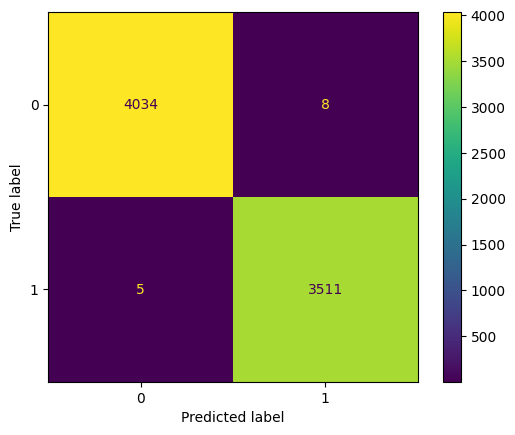

Confusion Matrix:
[[4034    8]
 [   5 3511]]
Detection rate:         99.85779294653014
Precision:              99.77266268826371
Recall:                 99.85779294653014
F1:                     99.81520966595593
Accuracy:               99.82799682455676
FAR:                    0.17006443717530212
ROC AUC:                99.8299355628247


In [ ]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred_binary)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_binary)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

In [ ]:
'''import lightgbm as lgb

# Assuming 'bst' is your trained LightGBM model
bst.save_model('NSL_KDD_20_Binary_NEW.txt')'''

"import lightgbm as lgb\n\n# Assuming 'bst' is your trained LightGBM model\nbst.save_model('NSL_KDD_20_Binary_NEW.txt')"

### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9970891770309606
Confusion Matrix:
 [[4028   14]
 [   8 3508]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4042
           1       1.00      1.00      1.00      3516

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



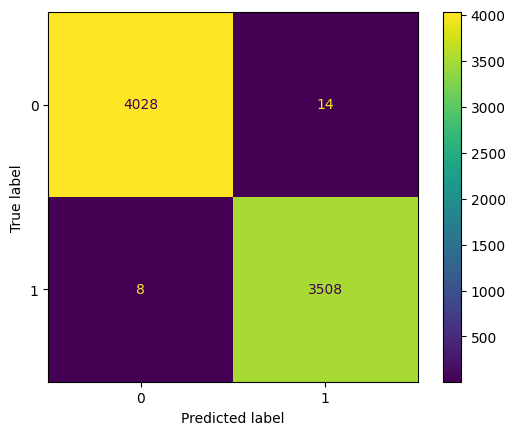

Confusion Matrix:
[[4028   14]
 [   8 3508]]
Detection rate:         99.77246871444824
Precision:              99.60249858035208
Recall:                 99.77246871444824
F1:                     99.68741119636262
Accuracy:               99.70891770309606
FAR:                    0.28694723604653977
ROC AUC:                99.71305276395346


In [ ]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

### Bagging Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9970891770309606
Confusion Matrix:
 [[4030   12]
 [  10 3506]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4042
           1       1.00      1.00      1.00      3516

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



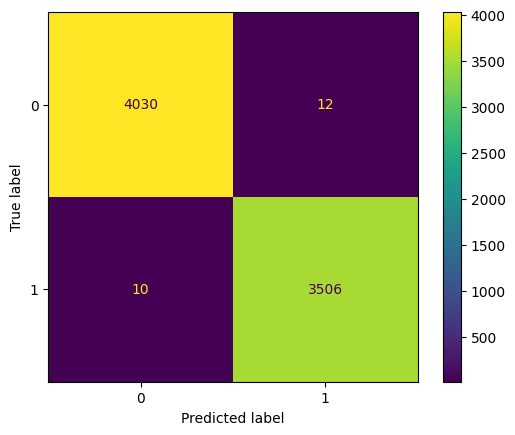

Confusion Matrix:
[[4030   12]
 [  10 3506]]
Detection rate:         99.7155858930603
Precision:              99.65889710062535
Recall:                 99.7155858930603
F1:                     99.68723343758884
Accuracy:               99.70891770309606
FAR:                    0.29064841913041617
ROC AUC:                99.70935158086958


In [ ]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

### Extra Trees

Accuracy: 0.9948399047367028


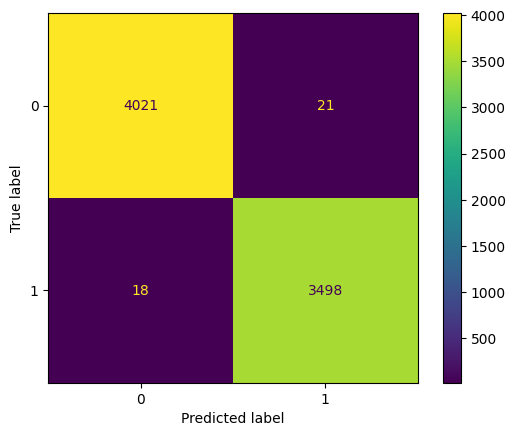

Confusion Matrix:
[[4021   21]
 [  18 3498]]
Detection rate:         99.48805460750853
Precision:              99.40323955669224
Recall:                 99.48805460750853
F1:                     99.44562899786781
Accuracy:               99.48399047367027
FAR:                    0.515745086151721
ROC AUC:                99.48425491384828


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier
extra_trees_classifier.fit(X_train, y_train)

# Make predictions
y_pred = extra_trees_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)

from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

### XGBoost

In [ ]:
pip install xgboost

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    min_child_weight=2,
    objective="binary:logistic"  # For binary classification
)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9960306959513099
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4042
           1       1.00      1.00      1.00      3516

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



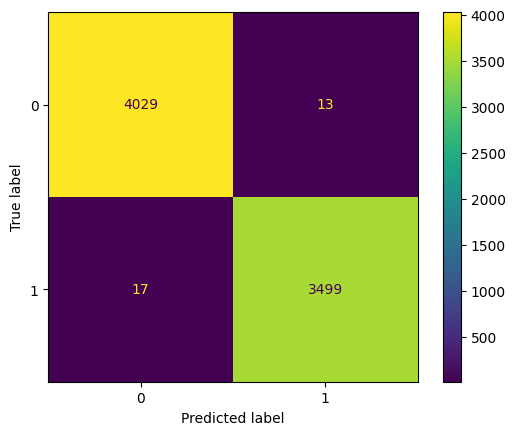

Confusion Matrix:
[[4029   13]
 [  17 3499]]
Detection rate:         99.5164960182025
Precision:              99.62984054669704
Recall:                 99.5164960182025
F1:                     99.57313602731931
Accuracy:               99.60306959513099
FAR:                    0.4025634703643597
ROC AUC:                99.59743652963564


In [ ]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

## Prediction

In [ ]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

pred_d=pd.read_csv('KDDTest-21.txt',sep=',',names=col_names)
pred_d

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0            13           tcp    telnet    SF        118       2425     0   
1             0           udp   private    SF         44          0     0   
2             0           tcp    telnet    S3          0         44     0   
3             0           udp   private    SF         53         55     0   
4             0           tcp   private    SH          0          0     0   
...         ...           ...       ...   ...        ...        ...   ...   
11845         0           udp  domain_u    SF         43         43     0   
11846         0           tcp      http    SF        336        285     0   
11847         1           tcp    telnet  RSTO          0         15     0   
11848         0           tcp    sunrpc   REJ          0          0     0   
11849         0           udp   private    SF         41          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                   0       0    0  ...                    0.38   
1                   0       0    0  ...                    1.00   
2                   0       0    0  ...                    0.31   
3                   0       0    0  ...                    1.00   
4                   0       0    0  ...                    0.06   
...               ...     ...  ...  ...                     ...   
11845               0       0    0  ...                    1.00   
11846               0       0    0  ...                    0.92   
11847               0       0    0  ...                    0.37   
11848               0       0    0  ...                    0.19   
11849               0       0    0  ...                    1.00   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                        0.12                         0.04   
1                        0.01                         0.01   
2                        0.61                         0.00   
3                        0.00                         0.87   
4                        1.00                         1.00   
...                       ...                          ...   
11845                    0.00                         0.01   
11846                    0.02                         0.00   
11847                    0.03                         0.01   
11848                    0.03                         0.01   
11849                    0.00                         0.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.00                  0.00   
1                             0.00                  0.00   
2                             0.00                  0.21   
3                             0.00                  0.00   
4                             0.00                  1.00   
...                            ...                   ...   
11845                         0.00                  0.00   
11846                         0.00                  0.00   
11847                         0.02                  0.05   
11848                         0.04                  0.00   
11849                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                          0.00                  0.12   
1                          0.00                  0.00   
2                          0.68                  0.60   
3                          0.00                  0.00   
4                          1.00                  0.00   
...                         ...                   ...   
11845                      0.00                  0.00   
11846                      0.00                  0.05   
11847                      0.08                  0.85   
11848                      0.00                  0.88   
11849                      0.00                  0.00   

       dst_host_srv_rerror_rate         label  difficulty_level  
0                          0.30  guess_passwd               

In [ ]:
pred_d.drop(pred_d.columns[[0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,30,31,34,35,36,37,38,39,40]], axis = 1, inplace=True)
pred_d=pred_d.drop(['difficulty_level'],axis=1)
pred_d['flag'] = pred_d['flag'].replace(['SF', 'S0','REJ', 'RSTR', 'SH','RSTO','S1','RSTOS0','S3','S2','OTH'], [1, 2,3,4,5,6,7,8,9,10,11])
pred_d['service'] = pred_d['service'].replace(['ftp_data', 'other','private', 'http', 'remote_job','name','netbios_ns','eco_i','mtp','telnet','finger','domain_u','supdup','uucp_path','Z39_50','smtp','csnet_ns','uucp','netbios_dgm','urp_i','auth','domain','ftp','bgp','ldap','ecr_i','gopher','vmnet','systat','http_443','efs','whois','imap4','iso_tsap','echo','klogin','link','sunrpc','login','kshell','sql_net','time','hostnames','exec','ntp_u','discard','nntp','courier','ctf','ssh','daytime','shell','netstat','pop_3','nnsp','IRC','pop_2','printer','tim_i','pm_dump','red_i','netbios_ssn','rje','X11','urh_i','http_8001','aol','harvest','http_2784','tftp_u'], [1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
pred_d['label'] = pred_d['label'].replace(['normal'], [0])
pred_d['label'] = pred_d['label'].replace(['apache2',
 'smurf',
 'neptune',
 'back',
 'teardrop',
 'pod',
 'land',
 'mailbomb',
 'processtable',
 'udpstorm'], [1,1,1,1,1,1,1,1,1,1])
pred_d['label'] = pred_d['label'].replace(['warezclient',
 'guess_passwd',
 'warezmaster',
 'imap',
 'ftp_write',
 'named',
 'multihop',
 'phf',
 'spy',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'worm',
 'xsnoop',
 'xlock'], [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])
pred_d['label'] = pred_d['label'].replace(['buffer_overflow',
 'httptunnel',
 'rootkit',
 'loadmodule',
 'perl',
 'xterm',
 'ps',
 'sqlattack'], [3,3,3,3,3,3,3,3])
pred_d['label'] = pred_d['label'].replace(['satan', 'saint', 'ipsweep', 'portsweep', 'nmap', 'mscan'], [4,4,4,4,4,4])
pred_d

service  flag  src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  \
0           10     1        118       2425           1.00           0.00   
1            3     1         44          0           0.75           0.50   
2           10     9          0         44           1.00           0.00   
3            3     1         53         55           1.00           0.00   
4            3     5          0          0           1.00           0.00   
...        ...   ...        ...        ...            ...            ...   
11845       12     1         43         43           1.00           0.00   
11846        4     1        336        285           1.00           0.00   
11847       10     6          0         15           1.00           0.00   
11848       38     3          0          0           0.20           0.80   
11849        3     1         41          0           1.00           0.00   

       dst_host_srv_count  dst_host_same_srv_rate  label  
0                      10                    0.38      2  
1                     254                    1.00      2  
2                      79                    0.31      1  
3                     255                    1.00      0  
4                       1                    0.06      4  
...                   ...                     ...    ...  
11845                 255                    1.00      0  
11846                 234                    0.92      0  
11847                  96                    0.37      4  
11848                  52                    0.19      4  
11849                 255                    1.00      2  

[11850 rows x 9 columns]

In [ ]:
pred_d['label'] = pred_d['label'].replace([1,2,3,4], [1,1,1,1])
pred_d

service  flag  src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  \
0           10     1        118       2425           1.00           0.00   
1            3     1         44          0           0.75           0.50   
2           10     9          0         44           1.00           0.00   
3            3     1         53         55           1.00           0.00   
4            3     5          0          0           1.00           0.00   
...        ...   ...        ...        ...            ...            ...   
11845       12     1         43         43           1.00           0.00   
11846        4     1        336        285           1.00           0.00   
11847       10     6          0         15           1.00           0.00   
11848       38     3          0          0           0.20           0.80   
11849        3     1         41          0           1.00           0.00   

       dst_host_srv_count  dst_host_same_srv_rate  label  
0                      10                    0.38      1  
1                     254                    1.00      1  
2                      79                    0.31      1  
3                     255                    1.00      0  
4                       1                    0.06      1  
...                   ...                     ...    ...  
11845                 255                    1.00      0  
11846                 234                    0.92      0  
11847                  96                    0.37      1  
11848                  52                    0.19      1  
11849                 255                    1.00      1  

[11850 rows x 9 columns]

In [ ]:
pred_d['label'].value_counts()

1    9698
0    2152
Name: label, dtype: int64

In [ ]:
import random
t=random.randint(0,11850)
t

9448

In [ ]:
a=pred_d.iloc[t].to_frame()
a=a.T
a

service  flag  src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  \
9448    12.00  1.00      45.00      71.00           1.00           0.00   

      dst_host_srv_count  dst_host_same_srv_rate  label  
9448              220.00                    0.91   0.00

In [ ]:
a=a.drop(['label'],axis=1)
a

service  flag  src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  \
9448    12.00  1.00      45.00      71.00           1.00           0.00   

      dst_host_srv_count  dst_host_same_srv_rate  
9448              220.00                    0.91

In [ ]:
import lightgbm as lgb

# Load the saved model
loaded_model = lgb.Booster(model_file='NSL_KDD_20_Binary_NEW.txt')

# Make predictions
predictions = loaded_model.predict(a)
print(predictions)

if predictions>0.5:
  print('Anomalous trace')
else:
  print("Normal trace")

[1.57998353e-07]
Normal trace


# ADFA-LD

## Importing

In [ ]:
import pandas as pd
fm_10=pd.read_csv('FM10.csv',index_col=0)

y=fm_10['Label']
X=fm_10.drop(['Label'],axis=1)
y=y.to_frame()

## Normalization

In [ ]:
# Using Sklearn & MinMax Scalar.
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fm_10_nor= pd.DataFrame(x_scaled)
#fm_10_nor

In [ ]:
X=fm_10_nor

## LazyPredict

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(predictions)
models

 93%|█████████▎| 27/29 [00:04<00:00,  8.47it/s]

[LightGBM] [Info] Number of positive: 513, number of negative: 592
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1458
[LightGBM] [Info] Number of data points in the train set: 1105, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464253 -> initscore=-0.143231
[LightGBM] [Info] Start training from score -0.143231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:04<00:00,  5.88it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.95     0.95      0.95   
ExtraTreesClassifier               0.95               0.95     0.95      0.95   
RandomForestClassifier             0.94               0.94     0.94      0.94   
XGBClassifier                      0.93               0.93     0.93      0.93   
BaggingClassifier                  0.92               0.92     0.92      0.92   
DecisionTreeClassifier             0.90               0.90     0.90      0.90   
LabelSpreading                     0.89               0.89     0.89      0.89   
LabelPropagation                   0.89               0.89     0.89      0.89   
KNeighborsClassifier               0.87               0.87     0.87      0.87   
ExtraTreeClassifier                0.86               0.86     0.86      0.86   
SVC                                0.85               0.85     0.85      0.85   
AdaBoostClassifier                 0.85               0.85     0.85      0.85   
NuSVC                              0.84               0.84     0.84      0.84   
GaussianNB                         0.69               0.69     0.69      0.69   
LogisticRegression                 0.67               0.67     0.67      0.67   
LinearSVC                          0.67               0.67     0.67      0.67   
CalibratedClassifierCV             0.67               0.67     0.67      0.67   
LinearDiscriminantAnalysis         0.66               0.66     0.66      0.66   
RidgeClassifier                    0.66               0.66     0.66      0.66   
RidgeClassifierCV                  0.66               0.66     0.66      0.66   
NearestCentroid                    0.65               0.65     0.65      0.65   
BernoulliNB                        0.64               0.64     0.64      0.64   
SGDClassifier                      0.63               0.63     0.63      0.63   
PassiveAggressiveClassifier        0.61               0.61     0.61      0.61   
QuadraticDiscriminantAnalysis      0.61               0.60     0.60      0.54   
Perceptron                         0.57               0.57     0.57      0.56   
DummyClassifier                    0.51               0.50     0.50      0.34   

                               Time Taken  
Model                                      
LGBMClassifier                       0.33  
ExtraTreesClassifier                 0.68  
RandomForestClassifier               0.52  
XGBClassifier                        0.50  
BaggingClassifier                    0.09  
DecisionTreeClassifier               0.05  
LabelSpreading                       0.32  
LabelPropagation                     0.28  
KNeighborsClassifier                 0.08  
ExtraTreeClassifier                  0.05  
SVC                                  0.17  
AdaBoostClassifier                   0.21  
NuSVC                                0.16  
GaussianNB                           0.04  
LogisticRegression                   0.10  
LinearSVC                            0.18  
CalibratedClassifierCV               0.49  
LinearDiscriminantAnalysis           0.12  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.07  
NearestCentroid                      0.08  
BernoulliNB                          0.04  
SGDClassifier                        0.04  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.06  
Perceptron                           0.04  
DummyClassifier                      0.03

## LightGBM

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
#import lightgbm as lgb
import optuna
import optuna.integration.lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume you have a DataFrame 'X' containing features and a Series 'y' containing labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'data_sampling_strategy': 'goss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
num_round = 300
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


[I 2023-09-06 12:29:54,378] A new study created in memory with name: no-name-c146a9c3-2bc9-4ec4-a2d7-b6547f640202
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.255274
[3]	valid_0's binary_error: 0.189873
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.120253
[6]	valid_0's binary_error: 0.126582
[7]	valid_0's binary_error: 0.122363
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.101266
[10]	valid_0's binary_error: 0.0907173
[11]	valid_0's binary_error: 0.0886076
[12]	valid_0's binary_error: 0.0886076
[13]	valid_0's binary_error: 0.0886076
[14]	valid_0's binary_error: 0.0801688
[15]	valid_0's binary_error: 0.0864979
[16]	valid_0's binary_error: 0.0759494
[17]	valid_0's binary_error: 0.0780591
[

feature_fraction, val_score: 0.056962:  14%|#4        | 1/7 [00:01<00:09,  1.59s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.308017
[3]	valid_0's binary_error: 0.234177
[4]	valid_0's binary_error: 0.172996
[5]	valid_0's binary_error: 0.183544
[6]	valid_0's binary_error: 0.14135
[7]	valid_0's binary_error: 0.128692
[8]	valid_0's binary_error: 0.118143
[9]	valid_0's binary_error: 0.109705
[10]	valid_0's binary_error: 0.109705
[11]	valid_0's binary_error: 0.107595
[12]	valid_0's binary_error: 0.109705
[13]	valid_0's binary_error: 0.109705
[14]	valid_0's binary_error: 0.111814
[15]	valid_0's binary_error: 0.109705
[16]	valid_0's binary_

feature_fraction, val_score: 0.056962:  29%|##8       | 2/7 [00:02<00:04,  1.08it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.2173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.170886
[4]	valid_0's binary_error: 0.126582
[5]	valid_0's binary_error: 0.120253
[6]	valid_0's binary_error: 0.124473
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.124473
[9]	valid_0's binary_error: 0.118143
[10]	valid_0's binary_error: 0.111814
[11]	valid_0's binary_error: 0.107595
[12]	valid_0's binary_error: 0.109705
[13]	valid_0's binary_error: 0.118143
[14]	valid_0'

feature_fraction, val_score: 0.056962:  43%|####2     | 3/7 [00:02<00:02,  1.42it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.196203
[3]	valid_0's binary_error: 0.183544
[4]	valid_0's binary_error: 0.151899
[5]	valid_0's binary_error: 0.14557
[6]	valid_0's binary_error: 0.135021
[7]	valid_0's binary_error: 0.135021
[8]	valid_0's binary_error: 0.137131
[9]	valid_0's binary_error: 0.130802
[10]	valid_0's binary_error: 0.132911
[11]	valid_0's binary_error: 0.122363
[12]	valid_0's binary_error: 0.113924
[13]	valid_0's binary_error: 0.111814
[14]	valid_0's binary_error: 0.107595
[15]	valid_0's binary_error: 0.109705
[16]	valid_

feature_fraction, val_score: 0.052743:  57%|#####7    | 4/7 [00:02<00:01,  1.65it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.208861
[3]	valid_0's binary_error: 0.149789
[4]	valid_0's binary_error: 0.14346
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.128692
[7]	valid_0's binary_error: 0.113924
[8]	valid_0's binary_error: 0.113924
[9]	valid_0's binary_error: 0.111814
[10]	valid_0's binary_error: 0.109705
[11]	valid_0's binary_error: 0.113924
[12]	valid_0's binary_error: 0.116034
[13]	valid_0's binary_error: 0.113924
[14]	valid_0's binary_error: 0.116034
[15]	valid_0's binary_error: 0.109705
[16]	valid_

feature_fraction, val_score: 0.052743:  71%|#######1  | 5/7 [00:03<00:01,  1.83it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.234177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.168776
[4]	valid_0's binary_error: 0.126582
[5]	valid_0's binary_error: 0.103376
[6]	valid_0's binary_error: 0.113924
[7]	valid_0's binary_error: 0.111814
[8]	valid_0's binary_error: 0.124473
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.107595
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.107595
[14]	valid_0's binary_error: 0.101266
[15]	valid_0's binary_error: 0.101266
[16]	valid

feature_fraction, val_score: 0.052743:  86%|########5 | 6/7 [00:03<00:00,  1.94it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.240506
[3]	valid_0's binary_error: 0.172996
[4]	valid_0's binary_error: 0.132911
[5]	valid_0's binary_error: 0.128692
[6]	valid_0's binary_error: 0.128692
[7]	valid_0's binary_error: 0.132911
[8]	valid_0's binary_error: 0.124473
[9]	valid_0's binary_error: 0.118143
[10]	valid_0's binary_error: 0.107595
[11]	valid_0's binary_error: 0.101266
[12]	valid_0's binary_error: 0.0991561
[13]	valid_0's binary_error: 0.103376
[14]	valid_0's binary_error: 0.101266
[15]	valid_0's binary_error: 0.103376
[16]	valid_0's binary_error: 0.107595
[17]	valid_0's binary_error: 0.101266
[18]	val

num_leaves, val_score: 0.052743:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:   5%|5         | 1/20 [00:00<00:13,  1.43it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  10%|#         | 2/20 [00:01<00:17,  1.05it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.221519
[3]	valid_0's binary_error: 0.221519
[4]	valid_0's binary_error: 0.179325
[5]	valid_0's binary_error: 0.181435
[6]	valid_0's binary_error: 0.151899
[7]	valid_0's binary_error: 0.149789
[8]	valid_0's binary_error: 0.154008
[9]	valid_0's binary_error: 0.149789
[10]	valid_0's binary_error: 0.158228
[11]	valid_0's binary_error: 0.154008
[12]	valid_0's binary_error: 0.14346
[13]	valid_0's binary_error: 0.151899
[14]	valid_0's binary_error: 0.147679
[15]	valid_0's binary_error: 0.14135
[16]	valid_0's binary_error: 0.139241
[17]	valid_0's binary_error: 0.14135
[18]	valid_0

num_leaves, val_score: 0.052743:  15%|#5        | 3/20 [00:02<00:15,  1.07it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  20%|##        | 4/20 [00:07<00:37,  2.37s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  25%|##5       | 5/20 [00:14<00:59,  3.96s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  30%|###       | 6/20 [00:16<00:49,  3.54s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  35%|###5      | 7/20 [00:26<01:10,  5.45s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's binary_error: 0.0590717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[296]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[299]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	va

num_leaves, val_score: 0.052743:  40%|####      | 8/20 [00:29<00:56,  4.72s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.491561
[3]	valid_0's binary_error: 0.261603
[4]	valid_0's binary_error: 0.261603
[5]	valid_0's binary_error: 0.261603
[6]	valid_0's binary_error: 0.261603
[7]	valid_0's binary_error: 0.261603
[8]	valid_0's binary_error: 0.261603
[9]	valid_0's binary_error: 0.261603
[10]	valid_0's binary_error: 0.261603
[11]	valid_0's binary_error: 0.255274
[12]	valid_0's binary_error: 0.255274
[13]	valid_0's binary_error: 0.255274
[14]	valid_0's binary_error: 0.255274
[15]	valid_0's binary_error: 0.255274
[16]	valid_0's binary_error: 0.255274
[17]	valid_0's binary_error: 0.257384
[18]	vali

num_leaves, val_score: 0.052743:  45%|####5     | 9/20 [00:30<00:39,  3.56s/it]


[289]	valid_0's binary_error: 0.122363
[290]	valid_0's binary_error: 0.124473
[291]	valid_0's binary_error: 0.118143
[292]	valid_0's binary_error: 0.120253
[293]	valid_0's binary_error: 0.122363
[294]	valid_0's binary_error: 0.118143
[295]	valid_0's binary_error: 0.116034
[296]	valid_0's binary_error: 0.120253
[297]	valid_0's binary_error: 0.120253
[298]	valid_0's binary_error: 0.122363
[299]	valid_0's binary_error: 0.120253
[300]	valid_0's binary_error: 0.120253
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best g

num_leaves, val_score: 0.052743:  50%|#####     | 10/20 [00:33<00:33,  3.36s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's binary_error: 0.0590717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[296]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[299]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	va

[I 2023-09-06 12:30:32,015] Trial 16 finished with value: 0.056962025316455694 and parameters: {'num_leaves': 80}. Best is trial 7 with value: 0.056962025316455694.
num_leaves, val_score: 0.052743:  50%|#####     | 10/20 [00:33<00:33,  3.36s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  55%|#####5    | 11/20 [00:38<00:34,  3.80s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  60%|######    | 12/20 [00:38<00:22,  2.86s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  65%|######5   | 13/20 [00:39<00:15,  2.20s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  70%|#######   | 14/20 [00:40<00:10,  1.75s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  75%|#######5  | 15/20 [00:40<00:07,  1.44s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  80%|########  | 16/20 [00:41<00:04,  1.23s/it]


[281]	valid_0's binary_error: 0.0590717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[282]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[283]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[284]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[285]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[286]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[287]	valid_0's binary_error: 0.0590717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[288]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[289]	valid_0's binary_error: 0.0590717
[LightGBM] [Warning] No further splits with 

num_leaves, val_score: 0.052743:  85%|########5 | 17/20 [00:42<00:03,  1.09s/it]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743:  90%|######### | 18/20 [00:43<00:01,  1.01it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[299]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


num_leaves, val_score: 0.052743:  95%|#########5| 19/20 [00:43<00:00,  1.09it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.196203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.151899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.14557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0'

num_leaves, val_score: 0.052743: 100%|##########| 20/20 [00:44<00:00,  2.24s/it]



[282]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[283]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[284]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[285]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[286]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[287]	valid_0's binary_error: 0.0590717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[288]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[289]	valid_0's binary_error: 0.0590717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[290]	valid_0's binary_error: 0.056962
[LightGBM] [Warning] No further splits with p

bagging, val_score: 0.052743:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.183544
[3]	valid_0's binary_error: 0.181435
[4]	valid_0's binary_error: 0.158228
[5]	valid_0's binary_error: 0.14346
[6]	valid_0's binary_error: 0.130802
[7]	valid_0's binary_error: 0.132911
[8]	valid_0's binary_error: 0.118143
[9]	valid_0's binary_error: 0.116034
[10]	valid_0's binary_error: 0.120253
[11]	valid_0's binary_error: 0.116034
[12]	valid_0's binary_error: 0.118143
[13]	valid_0's binary_error: 0.109705
[14]	valid_0's binary_error: 0.109705
[15]	valid_0's binary_error: 0.107595
[16]	valid_

bagging, val_score: 0.052743:  10%|#         | 1/10 [00:00<00:06,  1.38it/s]

[296]	valid_0's binary_error: 0.056962
[297]	valid_0's binary_error: 0.056962
[298]	valid_0's binary_error: 0.056962
[299]	valid_0's binary_error: 0.056962
[300]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.246835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.208861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.189873
[L

bagging, val_score: 0.052743:  20%|##        | 2/10 [00:01<00:05,  1.46it/s]

[262]	valid_0's binary_error: 0.0738397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's binary_error: 0.0738397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	valid_0's binary_error: 0.0738397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[265]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[266]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[268]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[269]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive

bagging, val_score: 0.048523:  30%|###       | 3/10 [00:02<00:04,  1.51it/s]

[244]	valid_0's binary_error: 0.0485232
[245]	valid_0's binary_error: 0.0485232
[246]	valid_0's binary_error: 0.0506329
[247]	valid_0's binary_error: 0.0506329
[248]	valid_0's binary_error: 0.0485232
[249]	valid_0's binary_error: 0.0506329
[250]	valid_0's binary_error: 0.0485232
[251]	valid_0's binary_error: 0.0485232
[252]	valid_0's binary_error: 0.0485232
[253]	valid_0's binary_error: 0.0485232
[254]	valid_0's binary_error: 0.0485232
[255]	valid_0's binary_error: 0.0464135
[256]	valid_0's binary_error: 0.0464135
[257]	valid_0's binary_error: 0.0464135
[258]	valid_0's binary_error: 0.0464135
[259]	valid_0's binary_error: 0.0464135
[260]	valid_0's binary_error: 0.0464135
[261]	valid_0's binary_error: 0.0464135
[262]	valid_0's binary_error: 0.0464135
[263]	valid_0's binary_error: 0.0485232
[264]	valid_0's binary_error: 0.0464135
[265]	valid_0's binary_error: 0.0464135
[266]	valid_0's binary_error: 0.0485232
[267]	valid_0's binary_error: 0.0485232
[268]	valid_0's binary_error: 0.0485232


bagging, val_score: 0.048523:  40%|####      | 4/10 [00:04<00:08,  1.50s/it]

[231]	valid_0's binary_error: 0.0443038
[232]	valid_0's binary_error: 0.0443038
[233]	valid_0's binary_error: 0.0443038
[234]	valid_0's binary_error: 0.0464135
[235]	valid_0's binary_error: 0.0443038
[236]	valid_0's binary_error: 0.0443038
[237]	valid_0's binary_error: 0.0464135
[238]	valid_0's binary_error: 0.0464135
[239]	valid_0's binary_error: 0.0464135
[240]	valid_0's binary_error: 0.0464135
[241]	valid_0's binary_error: 0.0443038
[242]	valid_0's binary_error: 0.0443038
[243]	valid_0's binary_error: 0.0443038
[244]	valid_0's binary_error: 0.0443038
[245]	valid_0's binary_error: 0.0464135
[246]	valid_0's binary_error: 0.0464135
[247]	valid_0's binary_error: 0.0464135
[248]	valid_0's binary_error: 0.0464135
[249]	valid_0's binary_error: 0.0485232
[250]	valid_0's binary_error: 0.0485232
[251]	valid_0's binary_error: 0.0485232
[252]	valid_0's binary_error: 0.0485232
[253]	valid_0's binary_error: 0.0485232
[254]	valid_0's binary_error: 0.0485232
[255]	valid_0's binary_error: 0.0485232


bagging, val_score: 0.048523:  50%|#####     | 5/10 [00:05<00:05,  1.15s/it]


[281]	valid_0's binary_error: 0.0485232
[282]	valid_0's binary_error: 0.0464135
[283]	valid_0's binary_error: 0.0464135
[284]	valid_0's binary_error: 0.0485232
[285]	valid_0's binary_error: 0.0464135
[286]	valid_0's binary_error: 0.0485232
[287]	valid_0's binary_error: 0.0464135
[288]	valid_0's binary_error: 0.0443038
[289]	valid_0's binary_error: 0.0443038
[290]	valid_0's binary_error: 0.0485232
[291]	valid_0's binary_error: 0.0506329
[292]	valid_0's binary_error: 0.0506329
[293]	valid_0's binary_error: 0.0506329
[294]	valid_0's binary_error: 0.0506329
[295]	valid_0's binary_error: 0.0506329
[296]	valid_0's binary_error: 0.0506329
[297]	valid_0's binary_error: 0.0506329
[298]	valid_0's binary_error: 0.0506329
[299]	valid_0's binary_error: 0.0485232
[300]	valid_0's binary_error: 0.0506329
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead

bagging, val_score: 0.048523:  60%|######    | 6/10 [00:05<00:03,  1.07it/s]


[186]	valid_0's binary_error: 0.0506329
[187]	valid_0's binary_error: 0.0506329
[188]	valid_0's binary_error: 0.0506329
[189]	valid_0's binary_error: 0.0506329
[190]	valid_0's binary_error: 0.0506329
[191]	valid_0's binary_error: 0.0506329
[192]	valid_0's binary_error: 0.0506329
[193]	valid_0's binary_error: 0.0506329
[194]	valid_0's binary_error: 0.0506329
[195]	valid_0's binary_error: 0.0506329
[196]	valid_0's binary_error: 0.0506329
[197]	valid_0's binary_error: 0.0506329
[198]	valid_0's binary_error: 0.0506329
[199]	valid_0's binary_error: 0.0506329
[200]	valid_0's binary_error: 0.0506329
[201]	valid_0's binary_error: 0.0506329
[202]	valid_0's binary_error: 0.0506329
[203]	valid_0's binary_error: 0.0506329
[204]	valid_0's binary_error: 0.0506329
[205]	valid_0's binary_error: 0.0527426
[206]	valid_0's binary_error: 0.0527426
[207]	valid_0's binary_error: 0.0527426
[208]	valid_0's binary_error: 0.0527426
[209]	valid_0's binary_error: 0.0527426
[210]	valid_0's binary_error: 0.0527426

[I 2023-09-06 12:30:49,306] Trial 32 finished with value: 0.05063291139240506 and parameters: {'bagging_fraction': 0.9832049617225237, 'bagging_freq': 1}. Best is trial 29 with value: 0.04852320675105485.
bagging, val_score: 0.048523:  60%|######    | 6/10 [00:05<00:03,  1.07it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.162447
[3]	valid_0's binary_error: 0.149789
[4]	valid_0's binary_error: 0.14135
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.122363
[7]	valid_0's binary_error: 0.122363
[8]	valid_0's binary_error: 0.118143
[9]	valid_0's binary_error: 0.109705
[10]	valid_0's binary_error: 0.111814
[11]	valid_0's binary_error: 0.107595
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.105485
[14]	valid_0's binary_error: 0.101266
[15]	valid_0's binary_error: 0.103376
[16]	valid_

bagging, val_score: 0.048523:  70%|#######   | 7/10 [00:06<00:02,  1.22it/s]


[262]	valid_0's binary_error: 0.0464135
[263]	valid_0's binary_error: 0.0464135
[264]	valid_0's binary_error: 0.0464135
[265]	valid_0's binary_error: 0.0443038
[266]	valid_0's binary_error: 0.0443038
[267]	valid_0's binary_error: 0.0443038
[268]	valid_0's binary_error: 0.0464135
[269]	valid_0's binary_error: 0.0443038
[270]	valid_0's binary_error: 0.0443038
[271]	valid_0's binary_error: 0.0443038
[272]	valid_0's binary_error: 0.0443038
[273]	valid_0's binary_error: 0.0464135
[274]	valid_0's binary_error: 0.0464135
[275]	valid_0's binary_error: 0.0464135
[276]	valid_0's binary_error: 0.0464135
[277]	valid_0's binary_error: 0.0464135
[278]	valid_0's binary_error: 0.0464135
[279]	valid_0's binary_error: 0.0464135
[280]	valid_0's binary_error: 0.0464135
[281]	valid_0's binary_error: 0.0464135
[282]	valid_0's binary_error: 0.0464135
[283]	valid_0's binary_error: 0.0464135
[284]	valid_0's binary_error: 0.0464135
[285]	valid_0's binary_error: 0.0464135
[286]	valid_0's binary_error: 0.0464135

bagging, val_score: 0.042194:  80%|########  | 8/10 [00:07<00:01,  1.35it/s]

[298]	valid_0's binary_error: 0.0421941
[299]	valid_0's binary_error: 0.0421941
[300]	valid_0's binary_error: 0.0421941
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	

bagging, val_score: 0.042194:  90%|######### | 9/10 [00:07<00:00,  1.49it/s]


[198]	valid_0's binary_error: 0.0464135
[199]	valid_0's binary_error: 0.0485232
[200]	valid_0's binary_error: 0.0485232
[201]	valid_0's binary_error: 0.0485232
[202]	valid_0's binary_error: 0.0485232
[203]	valid_0's binary_error: 0.0485232
[204]	valid_0's binary_error: 0.0506329
[205]	valid_0's binary_error: 0.0506329
[206]	valid_0's binary_error: 0.0506329
[207]	valid_0's binary_error: 0.0485232
[208]	valid_0's binary_error: 0.0485232
[209]	valid_0's binary_error: 0.0464135
[210]	valid_0's binary_error: 0.0485232
[211]	valid_0's binary_error: 0.0485232
[212]	valid_0's binary_error: 0.0485232
[213]	valid_0's binary_error: 0.0485232
[214]	valid_0's binary_error: 0.0485232
[215]	valid_0's binary_error: 0.0464135
[216]	valid_0's binary_error: 0.0485232
[217]	valid_0's binary_error: 0.0464135
[218]	valid_0's binary_error: 0.0485232
[219]	valid_0's binary_error: 0.0485232
[220]	valid_0's binary_error: 0.0485232
[221]	valid_0's binary_error: 0.0485232
[222]	valid_0's binary_error: 0.0485232

bagging, val_score: 0.042194: 100%|##########| 10/10 [00:08<00:00,  1.24it/s]


[262]	valid_0's binary_error: 0.0527426
[263]	valid_0's binary_error: 0.0527426
[264]	valid_0's binary_error: 0.0527426
[265]	valid_0's binary_error: 0.0527426
[266]	valid_0's binary_error: 0.0527426
[267]	valid_0's binary_error: 0.0527426
[268]	valid_0's binary_error: 0.0506329
[269]	valid_0's binary_error: 0.0506329
[270]	valid_0's binary_error: 0.0506329
[271]	valid_0's binary_error: 0.0506329
[272]	valid_0's binary_error: 0.0506329
[273]	valid_0's binary_error: 0.0506329
[274]	valid_0's binary_error: 0.0506329
[275]	valid_0's binary_error: 0.0506329
[276]	valid_0's binary_error: 0.0506329
[277]	valid_0's binary_error: 0.0506329
[278]	valid_0's binary_error: 0.0506329
[279]	valid_0's binary_error: 0.0506329
[280]	valid_0's binary_error: 0.0527426
[281]	valid_0's binary_error: 0.0527426
[282]	valid_0's binary_error: 0.0527426
[283]	valid_0's binary_error: 0.0506329
[284]	valid_0's binary_error: 0.0506329
[285]	valid_0's binary_error: 0.0506329
[286]	valid_0's binary_error: 0.0506329


feature_fraction_stage2, val_score: 0.042194:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.0970464
[14]	valid_0's binary_error: 0.0970464
[15]	valid_0's binary_error: 0.0970464
[16]	val

feature_fraction_stage2, val_score: 0.042194:  33%|###3      | 1/3 [00:00<00:01,  1.47it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.181435
[3]	valid_0's binary_error: 0.149789
[4]	valid_0's binary_error: 0.124473
[5]	valid_0's binary_error: 0.111814
[6]	valid_0's binary_error: 0.109705
[7]	valid_0's binary_error: 0.111814
[8]	valid_0's binary_error: 0.107595
[9]	valid_0's binary_error: 0.109705
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.0991561
[13]	valid_0's binary_error: 0.103376
[14]	valid_0's binary_error: 0.103376
[15]	valid_0's binary_error: 0.0970464
[16]	valid_0's binary_error: 0.0991561
[17]	valid_0's binary_error: 0.0991561
[18]	

feature_fraction_stage2, val_score: 0.042194:  67%|######6   | 2/3 [00:01<00:00,  1.68it/s]


[270]	valid_0's binary_error: 0.0527426
[271]	valid_0's binary_error: 0.0548523
[272]	valid_0's binary_error: 0.0548523
[273]	valid_0's binary_error: 0.0527426
[274]	valid_0's binary_error: 0.0548523
[275]	valid_0's binary_error: 0.0548523
[276]	valid_0's binary_error: 0.0548523
[277]	valid_0's binary_error: 0.0527426
[278]	valid_0's binary_error: 0.0527426
[279]	valid_0's binary_error: 0.0527426
[280]	valid_0's binary_error: 0.0527426
[281]	valid_0's binary_error: 0.0527426
[282]	valid_0's binary_error: 0.0527426
[283]	valid_0's binary_error: 0.0527426
[284]	valid_0's binary_error: 0.0527426
[285]	valid_0's binary_error: 0.0527426
[286]	valid_0's binary_error: 0.0527426
[287]	valid_0's binary_error: 0.0527426
[288]	valid_0's binary_error: 0.0527426
[289]	valid_0's binary_error: 0.0527426
[290]	valid_0's binary_error: 0.0527426
[291]	valid_0's binary_error: 0.0527426
[292]	valid_0's binary_error: 0.0527426
[293]	valid_0's binary_error: 0.0527426
[294]	valid_0's binary_error: 0.0527426

regularization_factors, val_score: 0.042194:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.272152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.185654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.175105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.154008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0

regularization_factors, val_score: 0.042194:   0%|          | 0/20 [00:00<?, ?it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_error: 0.109705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's binary_error: 0.107595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's binary_error: 0.105485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's binary_error: 0.105485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's binary_error: 0.103376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's binary_error: 0.103376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's binary_error: 0.103376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's binary_error: 0.103376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's binar

regularization_factors, val_score: 0.042194:   5%|5         | 1/20 [00:00<00:08,  2.27it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.172996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.156118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.14135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.135021
[LightGBM] [Warning] No

regularization_factors, val_score: 0.042194:  10%|#         | 2/20 [00:01<00:10,  1.69it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.0970464
[14]	valid_

regularization_factors, val_score: 0.042194:  15%|#5        | 3/20 [00:01<00:10,  1.64it/s]


[209]	valid_0's binary_error: 0.0485232
[210]	valid_0's binary_error: 0.0485232
[211]	valid_0's binary_error: 0.0464135
[212]	valid_0's binary_error: 0.0464135
[213]	valid_0's binary_error: 0.0464135
[214]	valid_0's binary_error: 0.0464135
[215]	valid_0's binary_error: 0.0485232
[216]	valid_0's binary_error: 0.0485232
[217]	valid_0's binary_error: 0.0485232
[218]	valid_0's binary_error: 0.0506329
[219]	valid_0's binary_error: 0.0506329
[220]	valid_0's binary_error: 0.0506329
[221]	valid_0's binary_error: 0.0485232
[222]	valid_0's binary_error: 0.0506329
[223]	valid_0's binary_error: 0.0506329
[224]	valid_0's binary_error: 0.0506329
[225]	valid_0's binary_error: 0.0506329
[226]	valid_0's binary_error: 0.0485232
[227]	valid_0's binary_error: 0.0527426
[228]	valid_0's binary_error: 0.0506329
[229]	valid_0's binary_error: 0.0506329
[230]	valid_0's binary_error: 0.0506329
[231]	valid_0's binary_error: 0.0485232
[232]	valid_0's binary_error: 0.0527426
[233]	valid_0's binary_error: 0.0506329

regularization_factors, val_score: 0.042194:  20%|##        | 4/20 [00:02<00:09,  1.64it/s]

[236]	valid_0's binary_error: 0.0527426
[237]	valid_0's binary_error: 0.0527426
[238]	valid_0's binary_error: 0.0527426
[239]	valid_0's binary_error: 0.0506329
[240]	valid_0's binary_error: 0.0506329
[241]	valid_0's binary_error: 0.0506329
[242]	valid_0's binary_error: 0.0506329
[243]	valid_0's binary_error: 0.0506329
[244]	valid_0's binary_error: 0.0527426
[245]	valid_0's binary_error: 0.0506329
[246]	valid_0's binary_error: 0.0506329
[247]	valid_0's binary_error: 0.0506329
[248]	valid_0's binary_error: 0.0506329
[249]	valid_0's binary_error: 0.0506329
[250]	valid_0's binary_error: 0.0506329
[251]	valid_0's binary_error: 0.0506329
[252]	valid_0's binary_error: 0.0506329
[253]	valid_0's binary_error: 0.0485232
[254]	valid_0's binary_error: 0.0485232
[255]	valid_0's binary_error: 0.0485232
[256]	valid_0's binary_error: 0.0485232
[257]	valid_0's binary_error: 0.0485232
[258]	valid_0's binary_error: 0.0485232
[259]	valid_0's binary_error: 0.0485232
[260]	valid_0's binary_error: 0.0485232


regularization_factors, val_score: 0.042194:  25%|##5       | 5/20 [00:02<00:09,  1.65it/s]

[235]	valid_0's binary_error: 0.0485232
[236]	valid_0's binary_error: 0.0485232
[237]	valid_0's binary_error: 0.0485232
[238]	valid_0's binary_error: 0.0485232
[239]	valid_0's binary_error: 0.0485232
[240]	valid_0's binary_error: 0.0485232
[241]	valid_0's binary_error: 0.0485232
[242]	valid_0's binary_error: 0.0485232
[243]	valid_0's binary_error: 0.0485232
[244]	valid_0's binary_error: 0.0464135
[245]	valid_0's binary_error: 0.0485232
[246]	valid_0's binary_error: 0.0485232
[247]	valid_0's binary_error: 0.0464135
[248]	valid_0's binary_error: 0.0485232
[249]	valid_0's binary_error: 0.0485232
[250]	valid_0's binary_error: 0.0485232
[251]	valid_0's binary_error: 0.0485232
[252]	valid_0's binary_error: 0.0485232
[253]	valid_0's binary_error: 0.0485232
[254]	valid_0's binary_error: 0.0485232
[255]	valid_0's binary_error: 0.0506329
[256]	valid_0's binary_error: 0.0506329
[257]	valid_0's binary_error: 0.0485232
[258]	valid_0's binary_error: 0.0485232
[259]	valid_0's binary_error: 0.0485232


regularization_factors, val_score: 0.042194:  30%|###       | 6/20 [00:03<00:08,  1.62it/s]


[243]	valid_0's binary_error: 0.0443038
[244]	valid_0's binary_error: 0.0443038
[245]	valid_0's binary_error: 0.0443038
[246]	valid_0's binary_error: 0.0443038
[247]	valid_0's binary_error: 0.0443038
[248]	valid_0's binary_error: 0.0443038
[249]	valid_0's binary_error: 0.0443038
[250]	valid_0's binary_error: 0.0443038
[251]	valid_0's binary_error: 0.0443038
[252]	valid_0's binary_error: 0.0443038
[253]	valid_0's binary_error: 0.0443038
[254]	valid_0's binary_error: 0.0443038
[255]	valid_0's binary_error: 0.0443038
[256]	valid_0's binary_error: 0.0443038
[257]	valid_0's binary_error: 0.0443038
[258]	valid_0's binary_error: 0.0443038
[259]	valid_0's binary_error: 0.0443038
[260]	valid_0's binary_error: 0.0464135
[261]	valid_0's binary_error: 0.0464135
[262]	valid_0's binary_error: 0.0443038
[263]	valid_0's binary_error: 0.0443038
[264]	valid_0's binary_error: 0.0443038
[265]	valid_0's binary_error: 0.0443038
[266]	valid_0's binary_error: 0.0443038
[267]	valid_0's binary_error: 0.0443038

regularization_factors, val_score: 0.042194:  35%|###5      | 7/20 [00:04<00:07,  1.63it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[268]	valid_0's binary_error: 0.0548523
[269]	valid_0's binary_error: 0.0527426
[270]	valid_0's binary_error: 0.0527426
[271]	valid_0's binary_error: 0.0527426
[272]	valid_0's binary_error: 0.0527426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[273]	valid_0's binary_error: 0.0527426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[274]	valid_0's binary_error: 0.0527426
[275]	valid_0's binary_error: 0.0548523
[276]	valid_0's binary_error: 0.0548523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[277]	valid_0's binary_error: 0.0527426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[278]	valid_0's binary_error: 0.0527426
[279]	valid_0's binary_error: 0.0527426
[280]	valid_0's binary_error: 0.0527426
[281]	valid_0's binary_error: 0.0527426
[LightGBM] [Warning] No further splits with positive gain, best 

regularization_factors, val_score: 0.042194:  40%|####      | 8/20 [00:04<00:07,  1.56it/s]


[245]	valid_0's binary_error: 0.0548523
[246]	valid_0's binary_error: 0.0548523
[247]	valid_0's binary_error: 0.0527426
[248]	valid_0's binary_error: 0.0548523
[249]	valid_0's binary_error: 0.0527426
[250]	valid_0's binary_error: 0.0548523
[251]	valid_0's binary_error: 0.0548523
[252]	valid_0's binary_error: 0.0548523
[253]	valid_0's binary_error: 0.0548523
[254]	valid_0's binary_error: 0.0548523
[255]	valid_0's binary_error: 0.0548523
[256]	valid_0's binary_error: 0.0548523
[257]	valid_0's binary_error: 0.0548523
[258]	valid_0's binary_error: 0.0548523
[259]	valid_0's binary_error: 0.0548523
[260]	valid_0's binary_error: 0.0548523
[261]	valid_0's binary_error: 0.0548523
[262]	valid_0's binary_error: 0.0548523
[263]	valid_0's binary_error: 0.056962
[264]	valid_0's binary_error: 0.0548523
[265]	valid_0's binary_error: 0.056962
[266]	valid_0's binary_error: 0.056962
[267]	valid_0's binary_error: 0.056962
[268]	valid_0's binary_error: 0.056962
[269]	valid_0's binary_error: 0.056962
[270]

[I 2023-09-06 12:30:58,273] Trial 47 finished with value: 0.05485232067510549 and parameters: {'lambda_l1': 1.596054857815754e-05, 'lambda_l2': 0.007397286690795729}. Best is trial 42 with value: 0.04430379746835443.
regularization_factors, val_score: 0.042194:  40%|####      | 8/20 [00:04<00:07,  1.56it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.164557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.147679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.137131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0'

regularization_factors, val_score: 0.042194:  45%|####5     | 9/20 [00:07<00:14,  1.28s/it]


[220]	valid_0's binary_error: 0.0443038
[221]	valid_0's binary_error: 0.0421941
[222]	valid_0's binary_error: 0.0421941
[223]	valid_0's binary_error: 0.0421941
[224]	valid_0's binary_error: 0.0421941
[225]	valid_0's binary_error: 0.0421941
[226]	valid_0's binary_error: 0.0443038
[227]	valid_0's binary_error: 0.0421941
[228]	valid_0's binary_error: 0.0400844
[229]	valid_0's binary_error: 0.0421941
[230]	valid_0's binary_error: 0.0421941
[231]	valid_0's binary_error: 0.0421941
[232]	valid_0's binary_error: 0.0421941
[233]	valid_0's binary_error: 0.0421941
[234]	valid_0's binary_error: 0.0421941
[235]	valid_0's binary_error: 0.0443038
[236]	valid_0's binary_error: 0.0400844
[237]	valid_0's binary_error: 0.0400844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[238]	valid_0's binary_error: 0.0400844
[239]	valid_0's binary_error: 0.0400844
[240]	valid_0's binary_error: 0.0400844
[241]	valid_0's binary_error: 0.0421941
[242]	valid_0's binary_error: 0.0443038
[243

regularization_factors, val_score: 0.042194:  50%|#####     | 10/20 [00:08<00:10,  1.07s/it]


[241]	valid_0's binary_error: 0.0464135
[242]	valid_0's binary_error: 0.0464135
[243]	valid_0's binary_error: 0.0464135
[244]	valid_0's binary_error: 0.0464135
[245]	valid_0's binary_error: 0.0464135
[246]	valid_0's binary_error: 0.0464135
[247]	valid_0's binary_error: 0.0464135
[248]	valid_0's binary_error: 0.0464135
[249]	valid_0's binary_error: 0.0464135
[250]	valid_0's binary_error: 0.0464135
[251]	valid_0's binary_error: 0.0464135
[252]	valid_0's binary_error: 0.0464135
[253]	valid_0's binary_error: 0.0485232
[254]	valid_0's binary_error: 0.0485232
[255]	valid_0's binary_error: 0.0485232
[256]	valid_0's binary_error: 0.0485232
[257]	valid_0's binary_error: 0.0464135
[258]	valid_0's binary_error: 0.0464135
[259]	valid_0's binary_error: 0.0464135
[260]	valid_0's binary_error: 0.0464135
[261]	valid_0's binary_error: 0.0464135
[262]	valid_0's binary_error: 0.0464135
[263]	valid_0's binary_error: 0.0464135
[264]	valid_0's binary_error: 0.0464135
[265]	valid_0's binary_error: 0.0464135

regularization_factors, val_score: 0.042194:  55%|#####5    | 11/20 [00:08<00:08,  1.05it/s]

[215]	valid_0's binary_error: 0.0738397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[216]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[217]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[218]	valid_0's binary_error: 0.07173
[219]	valid_0's binary_error: 0.0738397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[220]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[221]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[222]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[223]	valid_0's binary_error: 0.07173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[224]	valid_0's binary_error: 0.07173
[LightGBM] [Warn

regularization_factors, val_score: 0.042194:  60%|######    | 12/20 [00:09<00:06,  1.17it/s]


[210]	valid_0's binary_error: 0.0485232
[211]	valid_0's binary_error: 0.0485232
[212]	valid_0's binary_error: 0.0485232
[213]	valid_0's binary_error: 0.0485232
[214]	valid_0's binary_error: 0.0485232
[215]	valid_0's binary_error: 0.0464135
[216]	valid_0's binary_error: 0.0485232
[217]	valid_0's binary_error: 0.0464135
[218]	valid_0's binary_error: 0.0485232
[219]	valid_0's binary_error: 0.0485232
[220]	valid_0's binary_error: 0.0485232
[221]	valid_0's binary_error: 0.0485232
[222]	valid_0's binary_error: 0.0485232
[223]	valid_0's binary_error: 0.0485232
[224]	valid_0's binary_error: 0.0485232
[225]	valid_0's binary_error: 0.0464135
[226]	valid_0's binary_error: 0.0443038
[227]	valid_0's binary_error: 0.0443038
[228]	valid_0's binary_error: 0.0443038
[229]	valid_0's binary_error: 0.0443038
[230]	valid_0's binary_error: 0.0443038
[231]	valid_0's binary_error: 0.0421941
[232]	valid_0's binary_error: 0.0443038
[233]	valid_0's binary_error: 0.0443038
[234]	valid_0's binary_error: 0.0443038

[I 2023-09-06 12:31:02,881] Trial 51 finished with value: 0.04219409282700422 and parameters: {'lambda_l1': 1.7357473998032914e-06, 'lambda_l2': 3.070628075372076e-06}. Best is trial 51 with value: 0.04219409282700422.
regularization_factors, val_score: 0.042194:  60%|######    | 12/20 [00:09<00:06,  1.17it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.0970464
[14]	valid_0's binary_

regularization_factors, val_score: 0.042194:  65%|######5   | 13/20 [00:10<00:05,  1.28it/s]


[223]	valid_0's binary_error: 0.0485232
[224]	valid_0's binary_error: 0.0485232
[225]	valid_0's binary_error: 0.0464135
[226]	valid_0's binary_error: 0.0443038
[227]	valid_0's binary_error: 0.0443038
[228]	valid_0's binary_error: 0.0443038
[229]	valid_0's binary_error: 0.0443038
[230]	valid_0's binary_error: 0.0443038
[231]	valid_0's binary_error: 0.0421941
[232]	valid_0's binary_error: 0.0443038
[233]	valid_0's binary_error: 0.0443038
[234]	valid_0's binary_error: 0.0443038
[235]	valid_0's binary_error: 0.0443038
[236]	valid_0's binary_error: 0.0443038
[237]	valid_0's binary_error: 0.0443038
[238]	valid_0's binary_error: 0.0443038
[239]	valid_0's binary_error: 0.0443038
[240]	valid_0's binary_error: 0.0443038
[241]	valid_0's binary_error: 0.0443038
[242]	valid_0's binary_error: 0.0443038
[243]	valid_0's binary_error: 0.0443038
[244]	valid_0's binary_error: 0.0443038
[245]	valid_0's binary_error: 0.0443038
[246]	valid_0's binary_error: 0.0443038
[247]	valid_0's binary_error: 0.0443038

regularization_factors, val_score: 0.042194:  70%|#######   | 14/20 [00:10<00:04,  1.37it/s]


[210]	valid_0's binary_error: 0.0485232
[211]	valid_0's binary_error: 0.0485232
[212]	valid_0's binary_error: 0.0485232
[213]	valid_0's binary_error: 0.0485232
[214]	valid_0's binary_error: 0.0485232
[215]	valid_0's binary_error: 0.0464135
[216]	valid_0's binary_error: 0.0485232
[217]	valid_0's binary_error: 0.0464135
[218]	valid_0's binary_error: 0.0485232
[219]	valid_0's binary_error: 0.0485232
[220]	valid_0's binary_error: 0.0485232
[221]	valid_0's binary_error: 0.0485232
[222]	valid_0's binary_error: 0.0485232
[223]	valid_0's binary_error: 0.0485232
[224]	valid_0's binary_error: 0.0485232
[225]	valid_0's binary_error: 0.0464135
[226]	valid_0's binary_error: 0.0443038
[227]	valid_0's binary_error: 0.0443038
[228]	valid_0's binary_error: 0.0443038
[229]	valid_0's binary_error: 0.0443038
[230]	valid_0's binary_error: 0.0443038
[231]	valid_0's binary_error: 0.0421941
[232]	valid_0's binary_error: 0.0443038
[233]	valid_0's binary_error: 0.0443038
[234]	valid_0's binary_error: 0.0443038

regularization_factors, val_score: 0.042194:  75%|#######5  | 15/20 [00:11<00:03,  1.41it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.0970464
[14]	valid_0's binary_error: 0.0970464
[15]	valid_0's binary_error: 0.0970464
[16]	val

regularization_factors, val_score: 0.042194:  80%|########  | 16/20 [00:12<00:02,  1.44it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.0970464
[14]	valid_0's binary_error: 0.0970464
[15]	valid_0's binary_error: 0.0970464
[16]	val

regularization_factors, val_score: 0.042194:  85%|########5 | 17/20 [00:12<00:02,  1.44it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.0970464
[14]	valid_

regularization_factors, val_score: 0.042194:  90%|######### | 18/20 [00:13<00:01,  1.48it/s]


[230]	valid_0's binary_error: 0.0527426
[231]	valid_0's binary_error: 0.0527426
[232]	valid_0's binary_error: 0.0527426
[233]	valid_0's binary_error: 0.0527426
[234]	valid_0's binary_error: 0.0527426
[235]	valid_0's binary_error: 0.0527426
[236]	valid_0's binary_error: 0.0527426
[237]	valid_0's binary_error: 0.0527426
[238]	valid_0's binary_error: 0.0527426
[239]	valid_0's binary_error: 0.0506329
[240]	valid_0's binary_error: 0.0527426
[241]	valid_0's binary_error: 0.0527426
[242]	valid_0's binary_error: 0.0527426
[243]	valid_0's binary_error: 0.0527426
[244]	valid_0's binary_error: 0.0527426
[245]	valid_0's binary_error: 0.0527426
[246]	valid_0's binary_error: 0.0527426
[247]	valid_0's binary_error: 0.0527426
[248]	valid_0's binary_error: 0.0527426
[249]	valid_0's binary_error: 0.0527426
[250]	valid_0's binary_error: 0.0527426
[251]	valid_0's binary_error: 0.0527426
[252]	valid_0's binary_error: 0.0527426
[253]	valid_0's binary_error: 0.0527426
[254]	valid_0's binary_error: 0.0527426

regularization_factors, val_score: 0.042194:  95%|#########5| 19/20 [00:14<00:00,  1.48it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.156118
[3]	valid_0's binary_error: 0.14557
[4]	valid_0's binary_error: 0.137131
[5]	valid_0's binary_error: 0.137131
[6]	valid_0's binary_error: 0.120253
[7]	valid_0's binary_error: 0.118143
[8]	valid_0's binary_error: 0.111814
[9]	valid_0's binary_error: 0.107595
[10]	valid_0's binary_error: 0.105485
[11]	valid_0's binary_error: 0.105485
[12]	valid_0's binary_error: 0.105485
[13]	valid_0's binary_error: 0.0970464
[14]	valid_0's binary_error: 0.0970464
[15]	valid_0's binary_error: 0.0970464
[16]	val

regularization_factors, val_score: 0.042194: 100%|##########| 20/20 [00:14<00:00,  1.51it/s][I 2023-09-06 12:31:08,053] Trial 59 finished with value: 0.04219409282700422 and parameters: {'lambda_l1': 6.573280240633867e-08, 'lambda_l2': 9.056659985722409e-07}. Best is trial 51 with value: 0.04219409282700422.



[203]	valid_0's binary_error: 0.0485232
[204]	valid_0's binary_error: 0.0506329
[205]	valid_0's binary_error: 0.0506329
[206]	valid_0's binary_error: 0.0506329
[207]	valid_0's binary_error: 0.0485232
[208]	valid_0's binary_error: 0.0485232
[209]	valid_0's binary_error: 0.0464135
[210]	valid_0's binary_error: 0.0485232
[211]	valid_0's binary_error: 0.0485232
[212]	valid_0's binary_error: 0.0485232
[213]	valid_0's binary_error: 0.0485232
[214]	valid_0's binary_error: 0.0485232
[215]	valid_0's binary_error: 0.0464135
[216]	valid_0's binary_error: 0.0485232
[217]	valid_0's binary_error: 0.0464135
[218]	valid_0's binary_error: 0.0485232
[219]	valid_0's binary_error: 0.0485232
[220]	valid_0's binary_error: 0.0485232
[221]	valid_0's binary_error: 0.0485232
[222]	valid_0's binary_error: 0.0485232
[223]	valid_0's binary_error: 0.0485232
[224]	valid_0's binary_error: 0.0485232
[225]	valid_0's binary_error: 0.0464135
[226]	valid_0's binary_error: 0.0443038
[227]	valid_0's binary_error: 0.0443038

min_data_in_leaf, val_score: 0.042194:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.116034
[3]	valid_0's binary_error: 0.107595
[4]	valid_0's binary_error: 0.103376
[5]	valid_0's binary_error: 0.092827
[6]	valid_0's binary_error: 0.0970464
[7]	valid_0's binary_error: 0.0949367
[8]	valid_0's binary_error: 0.105485
[9]	valid_0's binary_error: 0.105485
[10]	valid_0's binary_error: 0.103376
[11]	valid_0's binary_error: 0.103376
[12]	valid_0's binary_error: 0.109705
[13]	valid_0's binary_error: 0.101266
[14]	valid_0's binary_error: 0.101266
[15]	valid_0's binary_error: 0.0949367
[16]	valid_0's binary_error: 0.0991561
[17]	valid_0's binary_error: 0.0970464
[18]

min_data_in_leaf, val_score: 0.042194:  20%|##        | 1/5 [00:00<00:02,  1.38it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[1]	valid_0's binary_error: 0.491561
[2]	valid_0's binary_error: 0.139241
[3]	valid_0's binary_error: 0.126582
[4]	valid_0's binary_error: 0.0970464
[5]	valid_0's binary_error: 0.0949367
[6]	valid_0's binary_error: 0.105485
[7]	valid_0's binary_error: 0.0949367
[8]	valid_0's binary_error: 0.0970464
[9]	valid_0's binary_error: 0.092827
[10]	valid_0's binary_error: 0.0949367
[11]	valid_0's binary_error: 0.0949367
[12]	valid_0's binary_error: 0.0949367
[13]	valid_0's binary_error: 0.0907173
[14]	valid_0's binary_error: 0.0907173
[15]	valid_0's binary_error: 0.0864979
[16]	valid_0's binary_error: 0.0886076
[17]	valid_0's binary_error: 0.09493

min_data_in_leaf, val_score: 0.042194:  40%|####      | 2/5 [00:01<00:01,  1.54it/s]


[199]	valid_0's binary_error: 0.0548523
[200]	valid_0's binary_error: 0.0527426
[201]	valid_0's binary_error: 0.0527426
[202]	valid_0's binary_error: 0.0527426
[203]	valid_0's binary_error: 0.0527426
[204]	valid_0's binary_error: 0.0506329
[205]	valid_0's binary_error: 0.0506329
[206]	valid_0's binary_error: 0.0548523
[207]	valid_0's binary_error: 0.0527426
[208]	valid_0's binary_error: 0.0527426
[209]	valid_0's binary_error: 0.0548523
[210]	valid_0's binary_error: 0.0527426
[211]	valid_0's binary_error: 0.0527426
[212]	valid_0's binary_error: 0.0527426
[213]	valid_0's binary_error: 0.0527426
[214]	valid_0's binary_error: 0.0527426
[215]	valid_0's binary_error: 0.0527426
[216]	valid_0's binary_error: 0.0527426
[217]	valid_0's binary_error: 0.0527426
[218]	valid_0's binary_error: 0.0527426
[219]	valid_0's binary_error: 0.0527426
[220]	valid_0's binary_error: 0.0527426
[221]	valid_0's binary_error: 0.0527426
[222]	valid_0's binary_error: 0.0527426
[223]	valid_0's binary_error: 0.0527426

min_data_in_leaf, val_score: 0.042194:  60%|######    | 3/5 [00:01<00:01,  1.73it/s]

[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: data_sampling_strategy
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.491561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.263713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.183544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.181435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_error: 0.166667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0

min_data_in_leaf, val_score: 0.042194:  80%|########  | 4/5 [00:02<00:00,  1.72it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[203]	valid_0's binary_error: 0.0632911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[204]	valid_0's binary_error: 0.0632911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[205]	valid_0's binary_error: 0.0632911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[206]	valid_0's binary_error: 0.0632911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[207]	valid_0's binary_error: 0.0632911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[208]	valid_0's binary_error: 0.0654008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[209]	valid_0's binary_error: 0.0632911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[210]	valid_0's binary_error: 0.0611814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[211

min_data_in_leaf, val_score: 0.042194: 100%|##########| 5/5 [00:05<00:00,  1.05s/it]

Accuracy: 0.9578059071729957


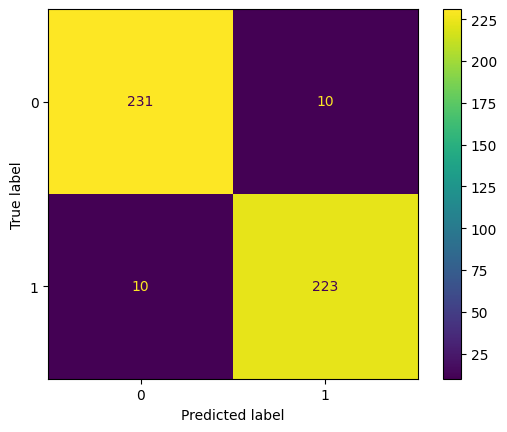

Confusion Matrix:
[[231  10]
 [ 10 223]]
Detection rate:         95.70815450643777
Precision:              95.70815450643777
Recall:                 95.70815450643777
F1:                     95.70815450643777
Accuracy:               95.78059071729957
FAR:                    4.220611543461613
ROC AUC:                95.7793884565384


In [ ]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred_binary)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_binary)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

### Prediction

In [ ]:
path='/content/UVD-0005.txt'

trace=pd.read_csv(path,sep=' ',header=None)
#trace.T.describe()

FileNotFoundError: ignored

In [ ]:
def feature_vectors(dataf):
    min_values=dataf.min(axis=1) #FV1  = min Si  in trace T
    max_values=dataf.max(axis=1) #FV2  = max Si  in trace T

    def most_repeated(series):
        return series.mode().iloc[0]

    most_rep_values=dataf.apply(most_repeated, axis=1) #FV3  = most frequent Si  in trace T

    def least_frequent(series):
        value_counts = series.value_counts()
        least_frequent_value = value_counts[value_counts == value_counts.min()].index
        return least_frequent_value[0]

    least_freq = dataf.apply(least_frequent, axis=1) # FV4  = least frequent Si  in trace T

    def count_odd(series):
        return (series % 2 == 1).sum()

    def count_even(series):
        return (series % 2 == 0).sum()

    odd_count = dataf.apply(count_odd, axis=1) #FV5  = number of odd Si  in trace T
    even_count = dataf.apply(count_even, axis=1) #FV6  = number of even Si  in trace T

    avg=dataf.mean(axis=1) #FV7: average of Si in trace T
    sd=dataf.std(axis=1) #FV8: standard deviation of Si in trace T
    cou=dataf.count(axis=1) #FV9: number of Si in trace T
    uniq=dataf.nunique(axis=1,dropna=True) #FV10: unique Si in trace T

    return(min_values,max_values,most_rep_values,least_freq,odd_count,even_count,avg,sd,cou,uniq)

In [ ]:
# Generate feature vector FV(kof6) for training data.

tr_f1,tr_f2,tr_f3,tr_f4,tr_f5,tr_f6,tr_f7,tr_f8,tr_f9,tr_f10=feature_vectors(trace)
tr_f1=tr_f1.to_frame() #Min values
tr_f2=tr_f2.to_frame() #Max values
tr_f3=tr_f3.to_frame() #Most freq values
tr_f4=tr_f4.to_frame() #Least freq values
tr_f5=tr_f5.to_frame() #Number of odd values
tr_f6=tr_f6.to_frame() #Number of even values
tr_f7=tr_f7.to_frame() #Average
tr_f8=tr_f8.to_frame() #Standard Deviation
tr_f9=tr_f9.to_frame() #Number of System Calls in a trace
tr_f10=tr_f10.to_frame() #Unique number of System Calls in a trace

tr_ft= pd.concat([tr_f1, tr_f2, tr_f3, tr_f4,tr_f5,tr_f6,tr_f7,tr_f8,tr_f9,tr_f10], axis=1)
tr_ft.columns=['FV1','FV2','FV3','FV4','FV5','FV6','FV7','FV8','FV9','FV10']
X=tr_ft
tr_ft

In [ ]:
loaded_model = lgb.Booster(model_file='ADFA_lightgbm.txt')
predictions=loaded_model.predict(tr_ft)

if predictions>0.5:
  print('Anomalous trace')
else:
  print("Normal trace")

## XGBoost

In [ ]:
pip install xgboost

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    min_child_weight=2,
    objective="binary:logistic"  # For binary classification
)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9345991561181435
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       241
           1       0.93      0.94      0.93       233

    accuracy                           0.93       474
   macro avg       0.93      0.93      0.93       474
weighted avg       0.93      0.93      0.93       474



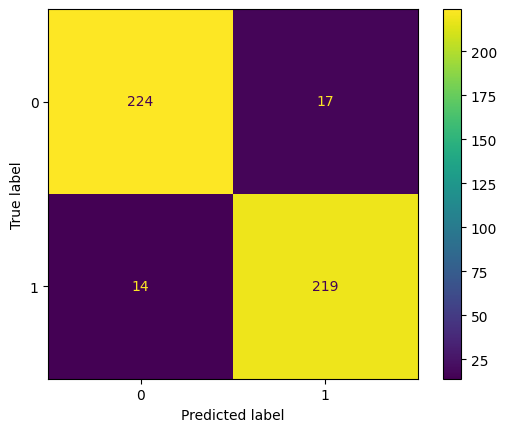

Confusion Matrix:
[[224  17]
 [ 14 219]]
Detection rate:         93.99141630901288
Precision:              92.79661016949152
Recall:                 93.99141630901288
F1:                     93.39019189765459
Accuracy:               93.45991561181435
FAR:                    6.531262799850408
ROC AUC:                93.4687372001496


In [ ]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

## Random Forest

Accuracy: 0.9367088607594937
Confusion Matrix:
 [[229  12]
 [ 18 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       241
           1       0.95      0.92      0.93       233

    accuracy                           0.94       474
   macro avg       0.94      0.94      0.94       474
weighted avg       0.94      0.94      0.94       474



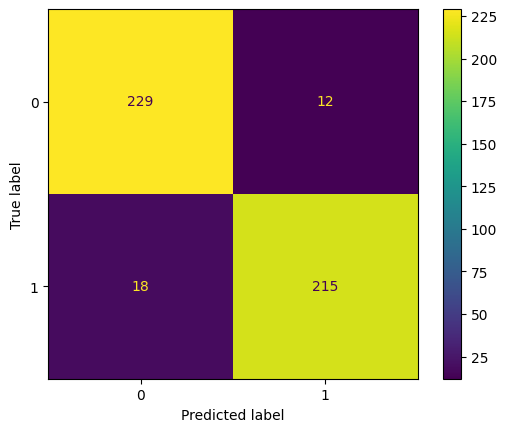

Confusion Matrix:
[[229  12]
 [ 18 215]]
Detection rate:         92.27467811158799
Precision:              94.7136563876652
Recall:                 92.27467811158799
F1:                     93.4782608695652
Accuracy:               93.67088607594937
FAR:                    6.352287500222607
ROC AUC:                93.64771249977738


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

## Extra Trees

Accuracy: 0.9472573839662447


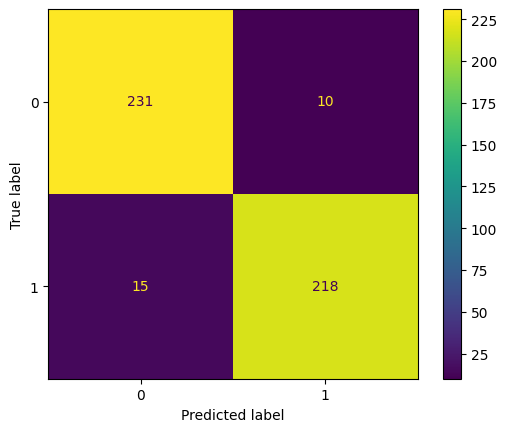

Confusion Matrix:
[[231  10]
 [ 15 218]]
Detection rate:         93.56223175965665
Precision:              95.6140350877193
Recall:                 93.56223175965665
F1:                     94.57700650759219
Accuracy:               94.72573839662446
FAR:                    5.293572916852171
ROC AUC:                94.70642708314784


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier
extra_trees_classifier.fit(X_train, y_train)

# Make predictions
y_pred = extra_trees_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)

from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)

## Bagging Classifier

Accuracy: 0.930379746835443
Confusion Matrix:
 [[229  12]
 [ 21 212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       241
           1       0.95      0.91      0.93       233

    accuracy                           0.93       474
   macro avg       0.93      0.93      0.93       474
weighted avg       0.93      0.93      0.93       474



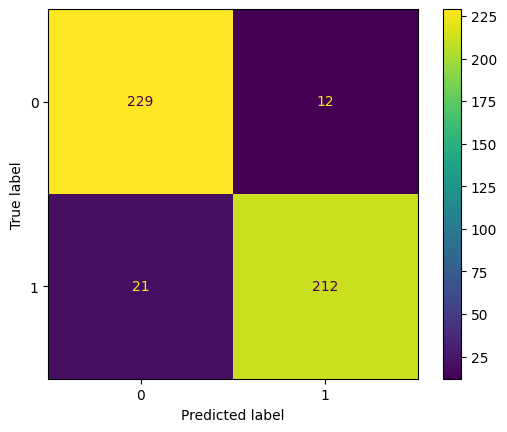

Confusion Matrix:
[[229  12]
 [ 21 212]]
Detection rate:         90.98712446351931
Precision:              94.64285714285714
Recall:                 90.98712446351931
F1:                     92.77899343544857
Accuracy:               93.0379746835443
FAR:                    6.996064324256941
ROC AUC:                93.00393567574305


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load or prepare your dataset and labels
# X: Features, y: Binary labels (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['0','1'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]
#detection_rate=tp/(tn+fp+fn+tp)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1_score=(2*precision*recall)/(precision+recall)
acc=(tp+tn)/(tp+tn+fp+fn)*100
tpr=tp/(tp+fn)*100 #True Positive Rate
fpr=fp/(fp+tn)*100 #False Positive Rate
fdr=fp/(fp+tp)*100 #False Discovery Rate
fnr=fn/(fn+tp)*100 #False Negative Rate
far=(fpr+fnr)/2

print('Detection rate:        ',tpr)
print('Precision:             ',precision)
print('Recall:                ',recall)
print('F1:                    ',f1_score)
print('Accuracy:              ',acc)
#print('False Positive Rate:   ',fpr)
#print('False Discovery Rate:  ',fdr)
#print('False Negative Rate:   ',fnr)
print('FAR:                   ',far)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print("ROC AUC:               ", roc_auc*100)